In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("youtube_scrape.csv")
df

,title,description,videoLength,thumbnailUrl,videoId,videoUrl,channelId,channelUrl,keywords,averageRating,...,likeCount,dislikeCount,authorThumbnailUrl,subscriberCount,category,publishDate,isLiveContent,isFamilySafe,query,timestamp
0,Trinh Tuan Dung - Interactive Course Materials...,NaN,185,https://i.ytimg.com/vi/7JfrWorLUdw/maxresdefau...,7JfrWorLUdw,https://www.youtube.com/watch?v=7JfrWorLUdw,UCNSaFyFPonGbx2EAGFBkwgA,https://www.youtube.com/channel/UCNSaFyFPonGbx...,NaN,NaN,...,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLShSNmQxGfxeYWd...,361 subscribers,Education,2021-06-08,False,True,https://www.youtube.com/watch?v=7JfrWorLUdw,2022-03-27T01:15:13.440Z
1,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,90,https://i.ytimg.com/vi/qnk99rTQZzQ/hqdefault.jpg,qnk99rTQZzQ,https://www.youtube.com/watch?v=qnk99rTQZzQ,UCP9tOGPsNkPhqfQUQOgtUVQ,https://www.youtube.com/channel/UCP9tOGPsNkPhq...,"SMU, SIS, School of Information Systems, Singa...",NaN,...,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLQ-4vhlowEz3eva...,385 subscribers,Education,2016-04-08,False,True,https://www.youtube.com/watch?v=qnk99rTQZzQ,2022-03-27T00:03:57.652Z
2,Team Anthanasios,NaN,307,https://i.ytimg.com/vi/UddTUfEwuZk/hqdefault.jpg,UddTUfEwuZk,https://www.youtube.com/watch?v=UddTUfEwuZk,UCP9tOGPsNkPhqfQUQOgtUVQ,https://www.youtube.com/channel/UCP9tOGPsNkPhq...,"School of Information Systems, SMU, Is480, Pro...",NaN,...,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLQ-4vhlowEz3eva...,385 subscribers,Education,2013-11-06,False,True,https://www.youtube.com/watch?v=UddTUfEwuZk,2022-03-27T00:10:33.973Z
3,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,26,https://i.ytimg.com/vi/OUmUlbEV0Mk/hqdefault.jpg,OUmUlbEV0Mk,https://www.youtube.com/watch?v=OUmUlbEV0Mk,UCP9tOGPsNkPhqfQUQOgtUVQ,https://www.youtube.com/channel/UCP9tOGPsNkPhq...,"B1g1, Singapore Management University, School ...",NaN,...,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLQ-4vhlowEz3eva...,385 subscribers,Education,2013-11-06,False,True,https://www.youtube.com/watch?v=OUmUlbEV0Mk,2022-03-27T00:11:22.926Z
4,Li Yuanming - Distributed Machine Learning,NaN,470,https://i.ytimg.com/vi/wEdYJ9NCEPw/hqdefault.jpg,wEdYJ9NCEPw,https://www.youtube.com/watch?v=wEdYJ9NCEPw,UCNSaFyFPonGbx2EAGFBkwgA,https://www.youtube.com/channel/UCNSaFyFPonGbx...,NaN,NaN,...,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLShSNmQxGfxeYWd...,361 subscribers,Education,2021-06-09,False,True,https://www.youtube.com/watch?v=wEdYJ9NCEPw,2022-03-27T01:14:22.845Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,347,https://i.ytimg.com/vi/eH6RTLhmz9M/hqdefault.jpg,eH6RTLhmz9M,https://www.youtube.com/watch?v=eH6RTLhmz9M,UCoLSRpZqPJMw1Pqt614H3HA,https://www.youtube.com/channel/UCoLSRpZqPJMw1...,"SIT, speech, university, singaporetech, open h...",NaN,...,6.0,NaN,https://yt3.ggpht.com/ytc/AKedOLQ5orpxTBIr0pMo...,2.51K subscribers,Education,18/3/2011,False,True,https://www.youtube.com/watch?v=eH6RTLhmz9M,2022-03-27T08:29:39.619Z
4793,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,388,https://i.ytimg.com/vi/EHn2jLejP5k/hqdefault.jpg,EHn2jLejP5k,https://www.youtube.com/watch?v=EHn2jLejP5k,UCoLSRpZqPJMw1Pqt614H3HA,https://www.youtube.com/channel/UCoLSRpZqPJMw1...,"SIT, speech, university, singaporetech, open h...",NaN,...,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLQ5orpxTBIr0pMo...,2.51K subscribers,Education,18/3/2011,False,True,https://www.youtube.com/watch?v=EHn2jLejP5k,2022-03-27T08:29:41.298Z
4794,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,599,https://i.ytimg.com/vi/ZHUpi_gVibk/hqdefault.jpg,ZHUpi_gVibk,https://www.youtube.com/watch?v=ZHUpi_gVibk,UCoLSRpZqPJMw1Pqt614H3HA,https://www.youtube.com/channel/UCoLSRpZqPJMw1...,"Open house, talks, SIT, highlights, university...",NaN,...,1.0,NaN,https://yt3.ggpht.com/ytc/AKedO

In [2]:
df.columns

Index(['title', 'description', 'videoLength', 'thumbnailUrl', 'videoId',
       'videoUrl', 'channelId', 'channelUrl', 'keywords', 'averageRating',
       'author', 'profileUrl', 'viewCount', 'likeCount', 'dislikeCount',
       'authorThumbnailUrl', 'subscriberCount', 'category', 'publishDate',
       'isLiveContent', 'isFamilySafe', 'query', 'timestamp'],
      dtype='object')

In [3]:
df.isna().sum()

title                    0
description           1327
videoLength              0
thumbnailUrl             0
videoId                  0
videoUrl                 0
channelId                0
channelUrl               0
keywords              2041
averageRating         4797
author                   0
profileUrl               0
viewCount               33
likeCount             1962
dislikeCount          4797
authorThumbnailUrl      33
subscriberCount        348
category                 0
publishDate              0
isLiveContent            0
isFamilySafe             0
query                    0
timestamp                0
dtype: int64

averageRating and dislikeCount is all missing data.
Useful columns to keep: title, description, videoLength, keywords, author, viewCount, likeCount, subscriberCount, category, publishDate

In [4]:
df["author"].unique()

array(['SCSEMarketing', 'SMU School of Computing and Information Systems',
       'Singapore Management University', 'NUS', 'NUS Computing', 'NTUsg',
       'Singapore University of Social Sciences (SUSS)',
       'SUTD Singapore University of Technology and Design',
       'Singapore Institute of Technology (SIT)'], dtype=object)

In [66]:
df2 = df.loc[:,["title","description","videoLength","keywords","author","viewCount","likeCount","subscriberCount","category","publishDate"]]
df2

,title,description,videoLength,keywords,author,viewCount,likeCount,subscriberCount,category,publishDate
0,Trinh Tuan Dung - Interactive Course Materials...,NaN,185,NaN,SCSEMarketing,0.0,NaN,361 subscribers,Education,2021-06-08
1,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,90,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2016-04-08
2,Team Anthanasios,NaN,307,"School of Information Systems, SMU, Is480, Pro...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2013-11-06
3,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,26,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2013-11-06
4,Li Yuanming - Distributed Machine Learning,NaN,470,NaN,SCSEMarketing,1.0,NaN,361 subscribers,Education,2021-06-09
...,...,...,...,...,...,...,...,...,...,...
4792,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,347,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),4688.0,6.0,2.51K subscribers,Education,18/3/2011
4793,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,388,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),370.0,NaN,2.51K subscribers,Education,18/3/2011
4794,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,599,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),647.0,1.0,2.51K subscribers,Education,13/3/2011
4795,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...",404,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1474.0,8.0,2.51K subscribers,Education,13/3/2011


In [6]:
df2

,title,description,videoLength,keywords,author,viewCount,likeCount,subscriberCount,category,publishDate
0,Trinh Tuan Dung - Interactive Course Materials...,NaN,185,NaN,SCSEMarketing,0.0,NaN,361 subscribers,Education,2021-06-08
1,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,90,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2016-04-08
2,Team Anthanasios,NaN,307,"School of Information Systems, SMU, Is480, Pro...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2013-11-06
3,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,26,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2013-11-06
4,Li Yuanming - Distributed Machine Learning,NaN,470,NaN,SCSEMarketing,1.0,NaN,361 subscribers,Education,2021-06-09
...,...,...,...,...,...,...,...,...,...,...
4792,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,347,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),4688.0,6.0,2.51K subscribers,Education,18/3/2011
4793,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,388,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),370.0,NaN,2.51K subscribers,Education,18/3/2011
4794,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,599,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),647.0,1.0,2.51K subscribers,Education,13/3/2011
4795,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...",404,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1474.0,8.0,2.51K subscribers,Education,13/3/2011


In [7]:
df2.isna().sum()

title                 0
description        1327
videoLength           0
keywords           2041
author                0
viewCount            33
likeCount          1962
subscriberCount     348
category              0
publishDate           0
dtype: int64

In [68]:
df2_dropna = df2.dropna(subset = ["keywords","description","subscriberCount"]).reset_index(drop = True)
df2_dropna

,title,description,videoLength,keywords,author,viewCount,likeCount,subscriberCount,category,publishDate
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,90,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2016-04-08
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,26,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2013-11-06
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,71,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,2.0,NaN,385 subscribers,Education,2016-04-08
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,24,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,2.0,NaN,385 subscribers,Education,2013-11-06
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,59,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,3.0,NaN,385 subscribers,Education,2014-11-30
...,...,...,...,...,...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,347,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),4688.0,6.0,2.51K subscribers,Education,18/3/2011
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,388,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),370.0,NaN,2.51K subscribers,Education,18/3/2011
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,599,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),647.0,1.0,2.51K subscribers,Education,13/3/2011
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...",404,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1474.0,8.0,2.51K subscribers,Education,13/3/2011


In [69]:
df2_dropna.isna().sum()

title                0
description          0
videoLength          0
keywords             0
author               0
viewCount            0
likeCount          740
subscriberCount      0
category             0
publishDate          0
dtype: int64

<AxesSubplot:>

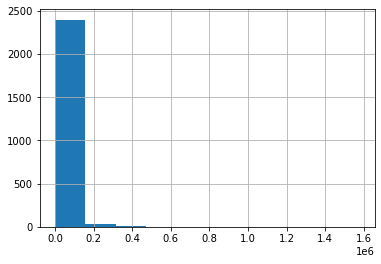

In [70]:
df2_dropna["viewCount"].hist()

In [71]:
df2_dropna_copy = df2_dropna.copy()

In [73]:
df2_dropna["subscriberCount_processed"] = df2_dropna["subscriberCount"].str.replace(" subscribers","")
x = []
# df2["subscriberCount_processed"] = [int(float(i.replace("K","")) *1000) for i in df2["subscriberCount_processed"] if "K" in i]
for i in df2_dropna['subscriberCount_processed']:
    if "K" in i:
        i = int(float(i.replace("K","")) *1000)
    x.append(int(i))
df2_dropna.insert(len(df2_dropna.columns)-1,"subscriberCountProcessed", x, True)
df2_dropna.drop("subscriberCount_processed", axis = 1, inplace = True)
df2_dropna

,title,description,videoLength,keywords,author,viewCount,likeCount,subscriberCount,category,publishDate,subscriberCountProcessed
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,90,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2016-04-08,385
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,26,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2013-11-06,385
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,71,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,2.0,NaN,385 subscribers,Education,2016-04-08,385
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,24,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,2.0,NaN,385 subscribers,Education,2013-11-06,385
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,59,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,3.0,NaN,385 subscribers,Education,2014-11-30,385
...,...,...,...,...,...,...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,347,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),4688.0,6.0,2.51K subscribers,Education,18/3/2011,2510
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,388,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),370.0,NaN,2.51K subscribers,Education,18/3/2011,2510
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,599,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),647.0,1.0,2.51K subscribers,Education,13/3/2011,2510
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...",404,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1474.0,8.0,2.51K subscribers,Education,13/3/2011,2510


In [74]:
df2_dropna['publishDateProcessed'] = pd.to_datetime(df2_dropna['publishDate'], infer_datetime_format=True)
df2_dropna

C:\Anaconda_File\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/11/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Anaconda_File\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/11/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Anaconda_File\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Anaconda_File\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for

,title,description,videoLength,keywords,author,viewCount,likeCount,subscriberCount,category,publishDate,subscriberCountProcessed,publishDateProcessed
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,90,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2016-04-08,385,2016-04-08
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,26,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2013-11-06,385,2013-11-06
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,71,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,2.0,NaN,385 subscribers,Education,2016-04-08,385,2016-04-08
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,24,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,2.0,NaN,385 subscribers,Education,2013-11-06,385,2013-11-06
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,59,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,3.0,NaN,385 subscribers,Education,2014-11-30,385,2014-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,347,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),4688.0,6.0,2.51K subscribers,Education,18/3/2011,2510,2011-03-18
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,388,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),370.0,NaN,2.51K subscribers,Education,18/3/2011,2510,2011-03-18
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,599,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),647.0,1.0,2.51K subscribers,Education,13/3/2011,2510,2011-03-13
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...",404,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1474.0,8.0,2.51K subscribers,Education,13/3/2011,2510,2011-03-13


In [75]:
df2_dropna.head()

,title,description,videoLength,keywords,author,viewCount,likeCount,subscriberCount,category,publishDate,subscriberCountProcessed,publishDateProcessed
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,90,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2016-04-08,385,2016-04-08
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,26,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2013-11-06,385,2013-11-06
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,71,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,2.0,NaN,385 subscribers,Education,2016-04-08,385,2016-04-08
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,24,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,2.0,NaN,385 subscribers,Education,2013-11-06,385,2013-11-06
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,59,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,3.0,NaN,385 subscribers,Education,2014-11-30,385,2014-11-30


In [76]:
df2_dropna.isna().sum()

title                         0
description                   0
videoLength                   0
keywords                      0
author                        0
viewCount                     0
likeCount                   740
subscriberCount               0
category                      0
publishDate                   0
subscriberCountProcessed      0
publishDateProcessed          0
dtype: int64

In [77]:
df3_dropna = df2_dropna.drop(["publishDate", "subscriberCount"], axis = 1)
df3_dropna

,title,description,videoLength,keywords,author,viewCount,likeCount,category,subscriberCountProcessed,publishDateProcessed
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,90,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1.0,NaN,Education,385,2016-04-08
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,26,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1.0,NaN,Education,385,2013-11-06
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,71,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,2.0,NaN,Education,385,2016-04-08
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,24,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,2.0,NaN,Education,385,2013-11-06
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,59,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,3.0,NaN,Education,385,2014-11-30
...,...,...,...,...,...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,347,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),4688.0,6.0,Education,2510,2011-03-18
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,388,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),370.0,NaN,Education,2510,2011-03-18
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,599,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),647.0,1.0,Education,2510,2011-03-13
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...",404,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1474.0,8.0,Education,2510,2011-03-13


In [132]:
df3_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     2439 non-null   object        
 1   description               2439 non-null   object        
 2   videoLength               2439 non-null   int64         
 3   keywords                  2439 non-null   object        
 4   author                    2439 non-null   object        
 5   viewCount                 2439 non-null   float64       
 6   likeCount                 1699 non-null   float64       
 7   category                  2439 non-null   object        
 8   subscriberCountProcessed  2439 non-null   int64         
 9   publishDateProcessed      2439 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 190.7+ KB


Potential factor: title, videoLength, keywords, publishDateProcessed

target: viewCount

In [134]:
df3_dropna['Year'] = df3_dropna['publishDateProcessed'].dt.year
df3_dropna['Month'] = df3_dropna['publishDateProcessed'].dt.month
df3_dropna.drop('publishDateProcessed', 1,inplace=True)

<ipython-input-134-4563288c96f9>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3_dropna.drop('publishDateProcessed', 1,inplace=True)


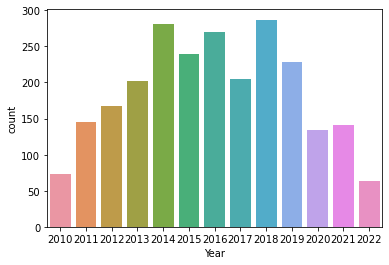

In [137]:
df3_dropna['Year'].unique()

plt.figure()
ax = sns.countplot(x="Year", data=df3_dropna)

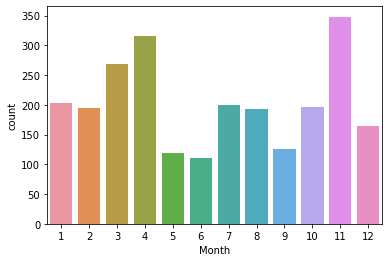

In [138]:
df3_dropna['Month'].unique()

plt.figure()
ax = sns.countplot(x="Month", data=df3_dropna)

In [139]:
df3_dropna

,title,description,videoLength,keywords,author,viewCount,likeCount,category,subscriberCountProcessed,Year,Month
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,90,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1.0,NaN,Education,385,2016,4
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,26,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1.0,NaN,Education,385,2013,11
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,71,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,2.0,NaN,Education,385,2016,4
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,24,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,2.0,NaN,Education,385,2013,11
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,59,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,3.0,NaN,Education,385,2014,11
...,...,...,...,...,...,...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,347,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),4688.0,6.0,Education,2510,2011,3
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,388,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),370.0,NaN,Education,2510,2011,3
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,599,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),647.0,1.0,Education,2510,2011,3
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...",404,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1474.0,8.0,Education,2510,2011,3


In [166]:
df3_dropna_object_col = df3_dropna.select_dtypes(include =["object"])
df3_dropna_numerical_col = df3_dropna.select_dtypes(include = np.number)

In [141]:
df3_dropna_numerical_col

,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
0,90,1.0,NaN,385,2016,4
1,26,1.0,NaN,385,2013,11
2,71,2.0,NaN,385,2016,4
3,24,2.0,NaN,385,2013,11
4,59,3.0,NaN,385,2014,11
...,...,...,...,...,...,...
2434,347,4688.0,6.0,2510,2011,3
2435,388,370.0,NaN,2510,2011,3
2436,599,647.0,1.0,2510,2011,3
2437,404,1474.0,8.0,2510,2011,3


In [142]:
df3_dropna_object_col

,title,description,keywords,author,category
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,Education
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,Education
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,Education
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,Education
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,Education
...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),Education
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),Education
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),Education
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...","SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),Education


In [143]:
knn_test = df3_dropna_numerical_col.dropna().reset_index(drop = True)
knn_test

,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
0,60,17.0,1.0,385,2014,3
1,71,25.0,1.0,385,2015,4
2,63,31.0,1.0,385,2014,11
3,64,35.0,1.0,385,2014,3
4,216,37.0,1.0,385,2022,1
...,...,...,...,...,...,...
1694,301,1513.0,3.0,2510,2011,3
1695,347,4688.0,6.0,2510,2011,3
1696,599,647.0,1.0,2510,2011,3
1697,404,1474.0,8.0,2510,2011,3


In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
knn_test_scaled = pd.DataFrame(scaler.fit_transform(knn_test), columns = knn_test.columns)
knn_test_scaled.head()

,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
0,0.003798,0.000000,0.0,0.001353,0.333333,0.181818
1,0.004586,0.000005,0.0,0.001353,0.416667,0.272727
2,0.004013,0.000009,0.0,0.001353,0.333333,0.909091
3,0.004084,0.000011,0.0,0.001353,0.333333,0.181818
4,0.014976,0.000013,0.0,0.001353,1.000000,0.000000


In [145]:
knn_test_scaled_v1 = knn_test_scaled.copy()
knn_test_scaled_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   videoLength               1699 non-null   float64
 1   viewCount                 1699 non-null   float64
 2   likeCount                 1699 non-null   float64
 3   subscriberCountProcessed  1699 non-null   float64
 4   Year                      1699 non-null   float64
 5   Month                     1699 non-null   float64
dtypes: float64(6)
memory usage: 79.8 KB


In [146]:
# Set seed for reproducibility
np.random.seed(2021)

# Defining feature columns
features = ["videoLength","viewCount", "likeCount","subscriberCountProcessed"]

#Inserting Nan values into Experiment group
for col in knn_test_scaled[features]:
    knn_test_scaled.loc[knn_test_scaled.sample(frac=0.1, replace =True).index, col] =np.nan
    
knn_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   videoLength               1538 non-null   float64
 1   viewCount                 1539 non-null   float64
 2   likeCount                 1531 non-null   float64
 3   subscriberCountProcessed  1541 non-null   float64
 4   Year                      1699 non-null   float64
 5   Month                     1699 non-null   float64
dtypes: float64(6)
memory usage: 79.8 KB


In [147]:
num_vals = len(knn_test_scaled.index)*8
print(f'The dataset (without target) has a total of {num_vals} values')

num_nan = knn_test_scaled.isna().sum().sum()
print(f'There are {num_nan} NaN values')

percent_nan = (num_nan/num_vals) *100
print(f'{round(percent_nan,2)}% of the dataset is missing')

nan_cols= knn_test_scaled[features]
nan_cols = nan_cols[nan_cols.isna().any(axis=1)]
nan_rows = len(nan_cols.index)
print(f'There are {nan_rows} rows with missing values')

total_missing = (nan_rows/8895)*100
print(f'{round(percent_nan,2)}% of the dataset is missing')

The dataset (without target) has a total of 13592 values
There are 647 NaN values
4.76% of the dataset is missing
There are 564 rows with missing values
4.76% of the dataset is missing


In [148]:
null_idx = list(nan_cols.index)

answer_key = knn_test_scaled_v1.iloc[null_idx]
answer_key

,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
7,0.004299,0.000013,0.000000,0.001353,0.333333,0.181818
15,0.003439,0.000016,0.000000,0.001353,0.250000,0.909091
17,0.004228,0.000021,0.000000,0.001353,0.416667,0.272727
18,0.004299,0.000021,0.000000,0.678674,0.333333,0.909091
19,0.009315,0.000023,0.000222,0.678674,0.500000,1.000000
...,...,...,...,...,...,...
1687,0.032674,0.000688,0.001777,0.121145,0.166667,1.000000
1689,0.040699,0.000965,0.000666,0.121145,0.166667,1.000000
1691,0.019991,0.000681,0.000666,0.121145,0.083333,0.272727
1695,0.024362,0.002962,0.001111,0.121145,0.083333,0.181818


In [149]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
knn_df3_dropna = pd.DataFrame(imputer.fit_transform(knn_test_scaled),columns = knn_test_scaled.columns)
knn_df3_dropna

,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
0,0.003798,0.000000,0.000000,0.001353,0.333333,0.181818
1,0.004586,0.000005,0.000000,0.001353,0.416667,0.272727
2,0.004013,0.000009,0.000000,0.001353,0.333333,0.909091
3,0.004084,0.000011,0.000000,0.001353,0.333333,0.181818
4,0.014976,0.000013,0.000000,0.001353,1.000000,0.000000
...,...,...,...,...,...,...
1694,0.021066,0.000949,0.000444,0.121145,0.083333,0.181818
1695,0.027601,0.002962,0.001111,0.121145,0.083333,0.181818
1696,0.042419,0.000399,0.000000,0.121145,0.083333,0.181818
1697,0.028447,0.000924,0.001555,0.472687,0.083333,0.181818


In [150]:
test_df3_dropna = knn_df3_dropna.iloc[null_idx]
test_df3_dropna

,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
7,0.004299,0.000013,0.000000,0.272281,0.333333,0.181818
15,0.003439,0.000016,0.000311,0.001353,0.250000,0.909091
17,0.004385,0.000021,0.000000,0.001353,0.416667,0.272727
18,0.004299,0.000772,0.000000,0.678674,0.333333,0.909091
19,0.009315,0.000121,0.000044,0.678674,0.500000,1.000000
...,...,...,...,...,...,...
1687,0.032674,0.000791,0.001777,0.121145,0.166667,1.000000
1689,0.040699,0.000791,0.000666,0.121145,0.166667,1.000000
1691,0.010791,0.000681,0.000666,1.000000,0.083333,0.272727
1695,0.027601,0.002962,0.001111,0.121145,0.083333,0.181818


In [151]:
test_df3_dropna = test_df3_dropna.reset_index()
test_df3_dropna.drop(["index", "likeCount"], axis= 1, inplace = True)
answer_key = answer_key.reset_index()
answer_key.drop(["index", "likeCount"], axis= 1, inplace = True)
results = pd.DataFrame((round((answer_key- test_df3_dropna),3)))
results.head()

,videoLength,viewCount,subscriberCountProcessed,Year,Month
0,0.0,0.000,-0.271,0.0,0.0
1,0.0,0.000,0.000,0.0,0.0
2,-0.0,0.000,0.000,0.0,0.0
3,0.0,-0.001,0.000,0.0,0.0
4,0.0,-0.000,0.000,0.0,0.0


In [152]:
imperfect_imputes = 0
for col in results.columns:
    for i in range(len(results)):
        if results[col][i] != 0.00 or results[col][i] != -0.00:
            imperfect_imputes += 1
total_imputes = 6806

perfect_imputes = total_imputes - imperfect_imputes

print(f'Total Values imputed: {total_imputes}')
print(f'Imperfect Imputations: {imperfect_imputes}')
print(f'Perfect Imputations: {perfect_imputes}')

Total Values imputed: 6806
Imperfect Imputations: 408
Perfect Imputations: 6398


In [153]:
squared_terms = []
for col in results.columns:
    for i in range(len(results)):
        if results[col][i] != 0.00 or results[col][i] != -0.00:
            error = results[col][i]
            squared_error = error**2
            squared_terms.append(squared_error)
n = 6806
sum_sqr_err = sum(squared_terms)
print(sum_sqr_err)
mse = sum_sqr_err/n
print(mse)
rmse = np.sqrt(mse)
print(f'RMSE for KNN Imputation on Melbourne dataset is {rmse}')

17.844646999999988
0.0026218993535116054
RMSE for KNN Imputation on Melbourne dataset is 0.05120448567763966


In [154]:
knn_test = df3_dropna_numerical_col.dropna().reset_index()
knn_test.drop("index", axis= 1, inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
knn_test_scaled = pd.DataFrame(scaler.fit_transform(knn_test), columns = knn_test.columns)
null_idx = list(nan_cols.index)
answer_key = knn_test_scaled.iloc[null_idx]
np.random.seed(2021)

# Defining feature columns
features = ["videoLength","viewCount", "likeCount","subscriberCountProcessed"]

#Inserting Nan values into Experiment group
for col in knn_test_scaled[features]:
    knn_test_scaled.loc[knn_test_scaled.sample(frac=0.1, replace =True).index, col] =np.nan
    
temp = knn_test_scaled
answer_temp = answer_key
result_list = []
for i in range(1,20,2):
    temp_list = []
    temp_list.append(i)
    knn_test_scaled = temp
    answer_key = answer_temp
    imputer = KNNImputer(n_neighbors=i)
    knn_df3_dropna = pd.DataFrame(imputer.fit_transform(knn_test_scaled),columns = knn_test_scaled.columns)
    test_df3_dropna = knn_df3_dropna.iloc[null_idx]
    test_df3_dropna = test_df3_dropna.reset_index()
    test_df3_dropna.drop(["index", "likeCount"], axis= 1, inplace = True)
    answer_key = answer_key.reset_index()
    answer_key.drop(["index", "likeCount"], axis= 1, inplace = True)
    results = pd.DataFrame((round((answer_key- test_df3_dropna),3)))
    imperfect_imputes = 0
    for col in results.columns:
        for i in range(len(results)):
            if results[col][i] != 0.00 or results[col][i] != -0.00:
                imperfect_imputes += 1
    total_imputes = 6806

    perfect_imputes = total_imputes - imperfect_imputes
    temp_list.append(total_imputes)
    temp_list.append(imperfect_imputes)
    temp_list.append(perfect_imputes)
    squared_terms = []
    for col in results.columns:
        for i in range(len(results)):
            if results[col][i] != 0.00 or results[col][i] != -0.00:
                error = results[col][i]
                squared_error = error**2
                squared_terms.append(squared_error)
    n = 6806
    sum_sqr_err = sum(squared_terms)
    mse = sum_sqr_err/n
    rmse = np.sqrt(mse)
    temp_list.append(rmse)
    result_list.append(temp_list)
print(result_list)

[[1, 6806, 279, 6527, 0.05898691687173945], [3, 6806, 369, 6437, 0.04936845642873336], [5, 6806, 408, 6398, 0.05120448567763966], [7, 6806, 414, 6392, 0.04911312183530028], [9, 6806, 419, 6387, 0.05004499591588535], [11, 6806, 426, 6380, 0.0504811582729818], [13, 6806, 441, 6365, 0.050447709054127245], [15, 6806, 441, 6365, 0.05035599684115674], [17, 6806, 444, 6362, 0.05028618363400152], [19, 6806, 447, 6359, 0.050312879424924926]]


In [155]:
print("num_of_neighbors, total_imputes,imperfect_imputes,perfect_imputes,rmse")
print(result_list)

num_of_neighbors, total_imputes,imperfect_imputes,perfect_imputes,rmse
[[1, 6806, 279, 6527, 0.05898691687173945], [3, 6806, 369, 6437, 0.04936845642873336], [5, 6806, 408, 6398, 0.05120448567763966], [7, 6806, 414, 6392, 0.04911312183530028], [9, 6806, 419, 6387, 0.05004499591588535], [11, 6806, 426, 6380, 0.0504811582729818], [13, 6806, 441, 6365, 0.050447709054127245], [15, 6806, 441, 6365, 0.05035599684115674], [17, 6806, 444, 6362, 0.05028618363400152], [19, 6806, 447, 6359, 0.050312879424924926]]


In [156]:
result_df = pd.DataFrame(np.array(result_list), columns = ["num_of_neighbors","total_imputes","imperfect_imputes","perfect_imputes","rmse"])
result_df

,num_of_neighbors,total_imputes,imperfect_imputes,perfect_imputes,rmse
0,1.0,6806.0,279.0,6527.0,0.058987
1,3.0,6806.0,369.0,6437.0,0.049368
2,5.0,6806.0,408.0,6398.0,0.051204
3,7.0,6806.0,414.0,6392.0,0.049113
4,9.0,6806.0,419.0,6387.0,0.050045
5,11.0,6806.0,426.0,6380.0,0.050481
6,13.0,6806.0,441.0,6365.0,0.050448
7,15.0,6806.0,441.0,6365.0,0.050356
8,17.0,6806.0,444.0,6362.0,0.050286
9,19.0,6806.0,447.0,6359.0,0.050313


In [157]:
result_df[["num_of_neighbors","total_imputes","imperfect_imputes","perfect_imputes"]] = result_df[["num_of_neighbors","total_imputes","imperfect_imputes","perfect_imputes"]].astype(int)
result_df

,num_of_neighbors,total_imputes,imperfect_imputes,perfect_imputes,rmse
0,1,6806,279,6527,0.058987
1,3,6806,369,6437,0.049368
2,5,6806,408,6398,0.051204
3,7,6806,414,6392,0.049113
4,9,6806,419,6387,0.050045
5,11,6806,426,6380,0.050481
6,13,6806,441,6365,0.050448
7,15,6806,441,6365,0.050356
8,17,6806,444,6362,0.050286
9,19,6806,447,6359,0.050313


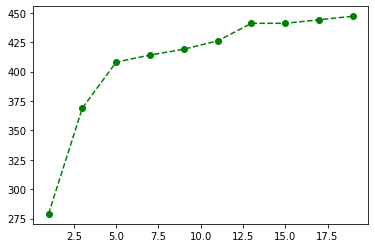

In [158]:
import matplotlib.pyplot as plt
x = result_df["num_of_neighbors"]
y = result_df["imperfect_imputes"]
plt.plot(x,y,"go--")
plt.show()

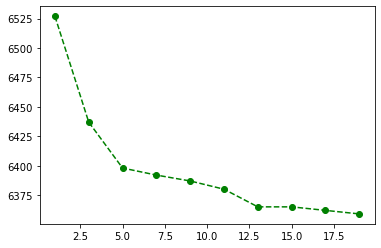

In [159]:
x = result_df["num_of_neighbors"]
y = result_df["perfect_imputes"]
plt.plot(x,y,"go--")
plt.show()

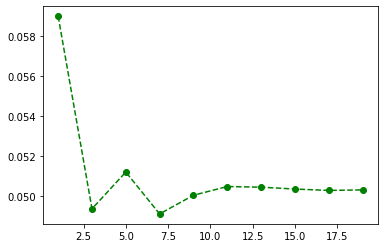

In [160]:
x = result_df["num_of_neighbors"]
y = result_df["rmse"]
plt.plot(x,y,"go--")
plt.show()

In [161]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=6)
df3_dropna_numerical_col = pd.DataFrame(imputer.fit_transform(df3_dropna_numerical_col),columns = df3_dropna_numerical_col.columns)
df3_dropna_numerical_col

,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
0,90.0,1.0,1.000000,385.0,2016.0,4.0
1,26.0,1.0,1.000000,385.0,2013.0,11.0
2,71.0,2.0,1.000000,385.0,2016.0,4.0
3,24.0,2.0,1.000000,385.0,2013.0,11.0
4,59.0,3.0,1.000000,385.0,2014.0,11.0
...,...,...,...,...,...,...
2434,347.0,4688.0,6.000000,2510.0,2011.0,3.0
2435,388.0,370.0,1.833333,2510.0,2011.0,3.0
2436,599.0,647.0,1.000000,2510.0,2011.0,3.0
2437,404.0,1474.0,8.000000,2510.0,2011.0,3.0


In [163]:
df3_dropna_numerical_col['likeCount'] = df3_dropna_numerical_col['likeCount'].astype(int)
df3_dropna_numerical_col['videoLength'] = df3_dropna_numerical_col['videoLength'].astype(int)
df3_dropna_numerical_col['viewCount'] = df3_dropna_numerical_col['viewCount'].astype(int)
df3_dropna_numerical_col['subscriberCountProcessed'] = df3_dropna_numerical_col['subscriberCountProcessed'].astype(int)
df3_dropna_numerical_col['Year'] = df3_dropna_numerical_col['Year'].astype(int)
df3_dropna_numerical_col['Month'] = df3_dropna_numerical_col['Month'].astype(int)
df3_dropna_numerical_col

,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
0,90,1,1,385,2016,4
1,26,1,1,385,2013,11
2,71,2,1,385,2016,4
3,24,2,1,385,2013,11
4,59,3,1,385,2014,11
...,...,...,...,...,...,...
2434,347,4688,6,2510,2011,3
2435,388,370,1,2510,2011,3
2436,599,647,1,2510,2011,3
2437,404,1474,8,2510,2011,3


In [111]:
df3_dropna_object_col

,title,description,keywords,author,category
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,Education
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,Education
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,Education
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,Education
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,Education
...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),Education
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),Education
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),Education
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...","SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),Education


In [113]:
df3_dropna_object_col.nunique()

title          2323
description    2024
keywords       1736
author            8
category         10
dtype: int64

In [167]:
df3_dropna_object_col = pd.get_dummies(df3_dropna_object_col, columns=["category"], prefix="category")
df3_dropna_object_col

,title,description,keywords,author,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Nonprofits & Activism,category_People & Blogs,category_Science & Technology,category_Sports,category_Travel & Events
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...","SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0


In [170]:
df3_dropna_numerical_col.columns

Index(['videoLength', 'viewCount', 'likeCount', 'subscriberCountProcessed',
       'Year', 'Month'],
      dtype='object')

In [171]:
df3_dropna_processed = df3_dropna_object_col.join(df3_dropna_numerical_col)
df3_dropna_processed

,title,description,keywords,author,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Nonprofits & Activism,category_People & Blogs,category_Science & Technology,category_Sports,category_Travel & Events,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,90,1,1,385,2016,4
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,26,1,1,385,2013,11
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,71,2,1,385,2016,4
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,24,2,1,385,2013,11
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,59,3,1,385,2014,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,347,4688,6,2510,2011,3
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,388,370,1,2510,2011,3
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,599,647,1,2510,2011,3
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...","SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,404,1474,8,2510,2011,3


In [173]:
df3_dropna_processed

,title,description,keywords,author,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Nonprofits & Activism,category_People & Blogs,category_Science & Technology,category_Sports,category_Travel & Events,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,90,1,1,385,2016,4
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,26,1,1,385,2013,11
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,71,2,1,385,2016,4
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,24,2,1,385,2013,11
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,59,3,1,385,2014,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,347,4688,6,2510,2011,3
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,388,370,1,2510,2011,3
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,599,647,1,2510,2011,3
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...","SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,404,1474,8,2510,2011,3


In [229]:
from sklearn.preprocessing import MinMaxScaler
training = df3_dropna_processed.drop(['title',"description","keywords","author","subscriberCountProcessed"],axis=1)
scaler = MinMaxScaler()
training[training.columns] = scaler.fit_transform(training[training.columns])
training.describe()


,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Nonprofits & Activism,category_People & Blogs,category_Science & Technology,category_Sports,category_Travel & Events,videoLength,viewCount,likeCount,Year,Month
count,2439.000000,2439.000000,2439.000000,2439.00000,2439.000000,2439.00000,2439.00000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000
mean,0.933989,0.006150,0.000410,0.00082,0.002460,0.00082,0.02993,0.020090,0.001640,0.003690,0.047884,0.006675,0.004240,0.494807,0.496739
std,0.248352,0.078197,0.020249,0.02863,0.049548,0.02863,0.17043,0.140338,0.040472,0.060646,0.100609,0.036375,0.030575,0.258726,0.325955
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.004443,0.000112,0.000000,0.333333,0.181818
50%,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.009315,0.000404,0.000444,0.500000,0.545455
75%,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.022213,0.001297,0.001999,0.666667,0.818182
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
x = training.drop(["viewCount","likeCount"],axis=1)
y = training.loc[:,["viewCount","likeCount"]]
x

,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Nonprofits & Activism,category_People & Blogs,category_Science & Technology,category_Sports,category_Travel & Events,videoLength,Year,Month
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005947,0.500000,0.272727
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001361,0.250000,0.909091
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004586,0.500000,0.272727
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001218,0.250000,0.909091
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003726,0.333333,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024362,0.083333,0.181818
2435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027300,0.083333,0.181818
2436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042419,0.083333,0.181818
2437,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028447,0.083333,0.181818


In [231]:
y

,viewCount,likeCount
0,0.000000e+00,0.000000
1,0.000000e+00,0.000000
2,6.340881e-07,0.000000
3,6.340881e-07,0.000000
4,1.268176e-06,0.000000
...,...,...
2434,2.971971e-03,0.001111
2435,2.339785e-04,0.000000
2436,4.096209e-04,0.000000
2437,9.340117e-04,0.001555


In [232]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(x, y["viewCount"], test_size=0.2, random_state=0)

In [233]:
from sklearn import metrics
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R-Square Value",metrics.r2_score(y_test,y_pred))
print("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value -0.00924611489580518
mean_absolute_error : 0.01123949712702618
mean_squared_error :  0.0017170906369555503
root_mean_squared_error :  0.041437792375506086


In [236]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.005506691933276364
slope: [-0.00292766  0.04096472 -0.00894766 -0.00984252 -0.00461566 -0.00979674
  0.01330608 -0.0067691  -0.00576707 -0.00560438 -0.00095822  0.00871546
 -0.00189096]


category_Entertainment, category_People & Blogs and year it was posted played a role in viewCount

Text(0.5, 1.0, 'Feature importance using Linear Regression Model')

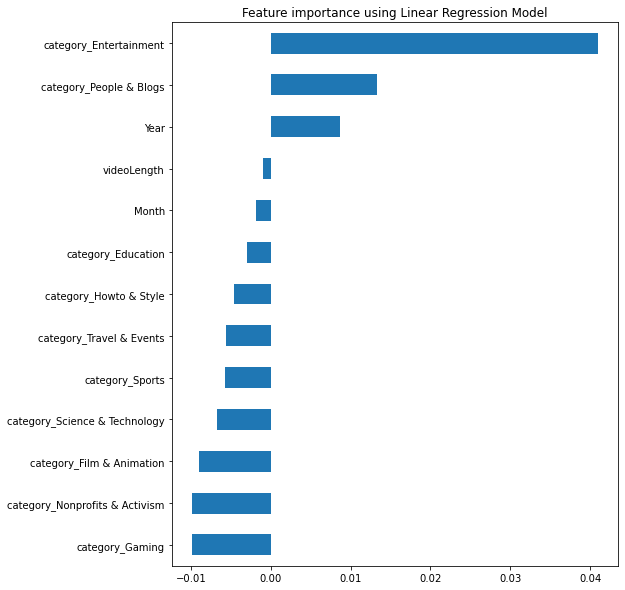

In [235]:
coef = pd.Series(model.coef_, index = x.columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")

In [237]:
df3_dropna_processed

,title,description,keywords,author,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Nonprofits & Activism,category_People & Blogs,category_Science & Technology,category_Sports,category_Travel & Events,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,90,1,1,385,2016,4
1,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,26,1,1,385,2013,11
2,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,71,2,1,385,2016,4
3,B1G1 - PyaeSone,Pyae Sone reflects on his project work with B1G1.,"Final Year Project, Singapore Management Unive...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,24,2,1,385,2013,11
4,"IS480 (AY2014-15, T1): Team 1Platform Pitch",Pitch video for IS480 Application Project (Aca...,"School of Information Systems, Singapore Manag...",SMU School of Computing and Information Systems,1,0,0,0,0,0,0,0,0,0,59,3,1,385,2014,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,347,4688,6,2510,2011,3
2435,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,388,370,1,2510,2011,3
2436,SIT Open House 2011 Highlights,Have a look at what happened over the 2 days w...,"Open house, talks, SIT, highlights, university...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,599,647,1,2510,2011,3
2437,"Dr Ting Seng Kiong, Deputy President (Academic...","Dr Ting gives his introduction to SIT, who we ...","SIT, speech, university, singaporetech, open h...",Singapore Institute of Technology (SIT),1,0,0,0,0,0,0,0,0,0,404,1474,8,2510,2011,3


In [263]:
ntu_scse = df3_dropna_processed[df3_dropna_processed['author'] == "SCSEMarketing"].reset_index(drop = True)
smu_scis = df3_dropna_processed[df3_dropna_processed['author'] == "SMU School of Computing and Information Systems"].reset_index(drop = True)
smu = df3_dropna_processed[df3_dropna_processed['author'] == "Singapore Management University"].reset_index(drop = True)
nus = df3_dropna_processed[df3_dropna_processed['author'] == "NUS"].reset_index(drop = True)
nus_computing = df3_dropna_processed[df3_dropna_processed['author'] == "NUS Computing"].reset_index(drop = True)
ntu = df3_dropna_processed[df3_dropna_processed['author'] == "NTUsg"].reset_index(drop = True)
suss = df3_dropna_processed[df3_dropna_processed['author'] == "Singapore University of Social Sciences (SUSS)"].reset_index(drop = True)
sutd = df3_dropna_processed[df3_dropna_processed['author'] == "SUTD Singapore University of Technology and Design"].reset_index(drop = True)
sit = df3_dropna_processed[df3_dropna_processed['author'] == "Singapore Institute of Technology (SIT)"].reset_index(drop = True)

R-Square Value -0.005616007485136798
mean_absolute_error : 0.011784845624085773
mean_squared_error :  0.010145069878200031
root_mean_squared_error :  0.10072273764250073


Text(0.5, 1.0, 'Feature importance using Linear Regression Model')

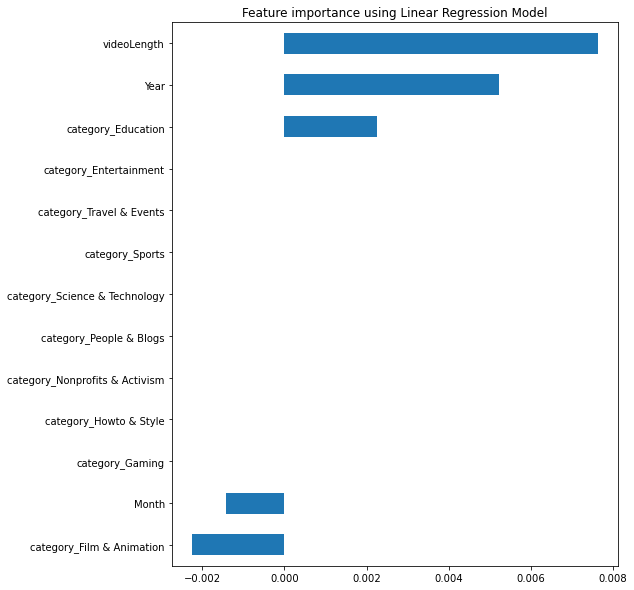

In [272]:
from sklearn.preprocessing import MinMaxScaler
training = smu_scis.drop(['title',"description","keywords","author","subscriberCountProcessed"],axis=1)
scaler = MinMaxScaler()
training[training.columns] = scaler.fit_transform(training[training.columns])
x = training.drop(["viewCount","likeCount"],axis=1)
y = training.loc[:,["viewCount","likeCount"]]
X_train, X_test, y_train, y_test = train_test_split(x, y["viewCount"], test_size=0.2, random_state=0)
from sklearn import metrics
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R-Square Value",metrics.r2_score(y_test,y_pred))
print("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

coef = pd.Series(model.coef_, index = x.columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")

In [289]:
df3_dropna_processed.describe()

,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Nonprofits & Activism,category_People & Blogs,category_Science & Technology,category_Sports,category_Travel & Events,videoLength,viewCount,likeCount,subscriberCountProcessed,Year,Month
count,2439.000000,2439.000000,2439.000000,2439.00000,2439.000000,2439.00000,2439.00000,2439.000000,2439.000000,2439.000000,2439.000000,2.439000e+03,2439.000000,2439.000000,2439.000000,2439.000000
mean,0.933989,0.006150,0.000410,0.00082,0.002460,0.00082,0.02993,0.020090,0.001640,0.003690,675.275523,1.052743e+04,20.090201,8669.542845,2015.937679,6.464125
std,0.248352,0.078197,0.020249,0.02863,0.049548,0.02863,0.17043,0.140338,0.040472,0.060646,1404.096289,5.736591e+04,137.647235,6557.345818,3.104717,3.585508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,7.000000,1.000000e+00,1.000000,361.000000,2010.000000,1.000000
25%,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,69.000000,1.770000e+02,1.000000,1330.000000,2014.000000,3.000000
50%,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,137.000000,6.380000e+02,3.000000,12400.000000,2016.000000,7.000000
75%,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,317.000000,2.047000e+03,10.000000,12400.000000,2018.000000,10.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,13963.000000,1.577069e+06,4503.000000,18100.000000,2022.000000,12.000000


C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viewCount', ylabel='Density'>

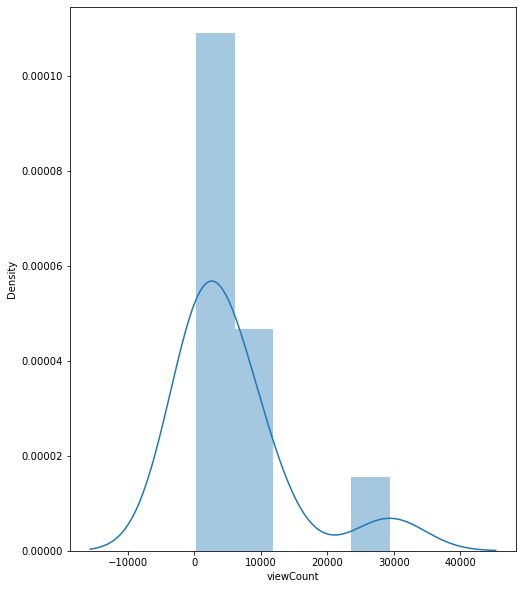

In [287]:
sns.distplot(ntu_scse['viewCount'])

C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viewCount', ylabel='Density'>

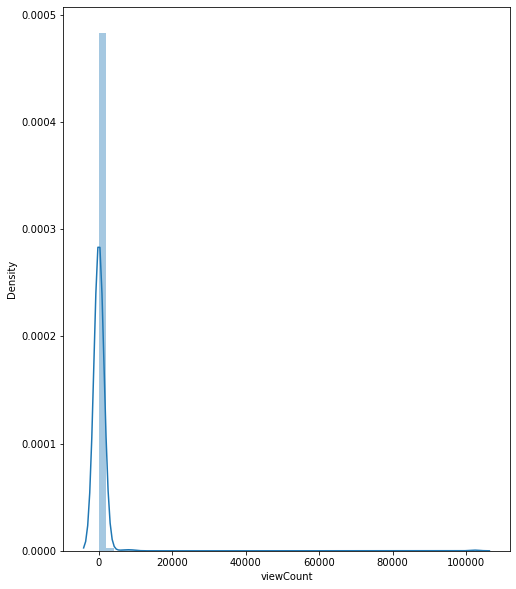

In [276]:
sns.distplot(smu_scis['viewCount'])

C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viewCount', ylabel='Density'>

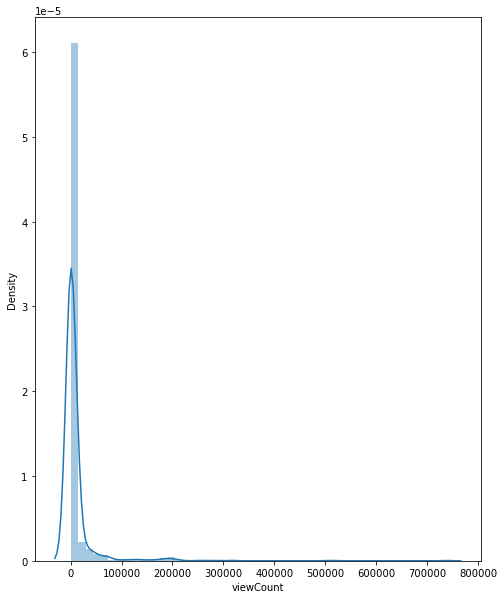

In [277]:
sns.distplot(smu['viewCount'])

C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viewCount', ylabel='Density'>

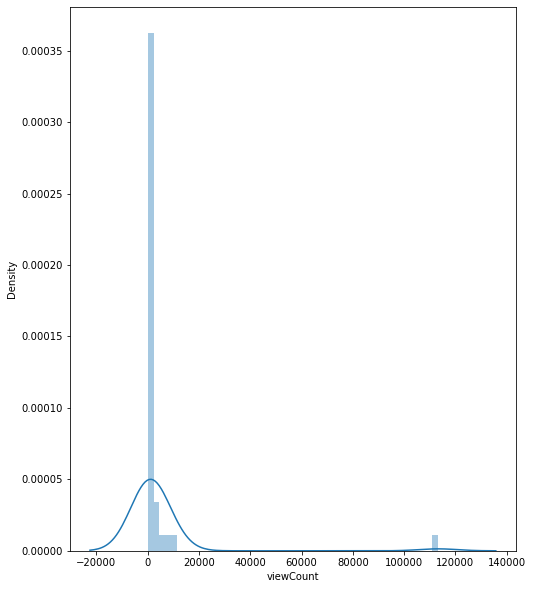

In [278]:
sns.distplot(nus['viewCount'])

C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viewCount', ylabel='Density'>

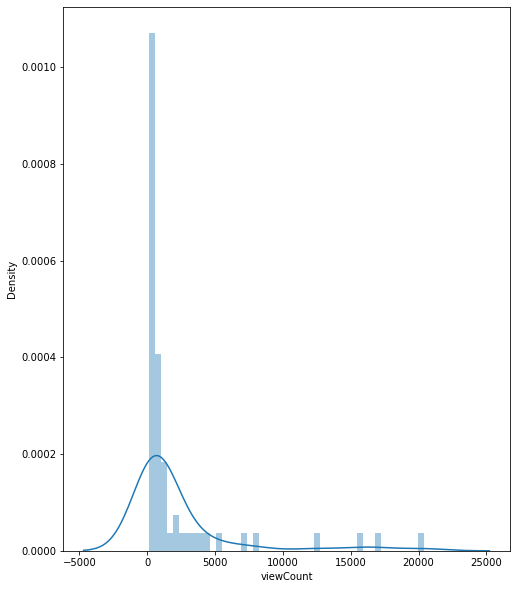

In [279]:
sns.distplot(nus_computing['viewCount'])

C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viewCount', ylabel='Density'>

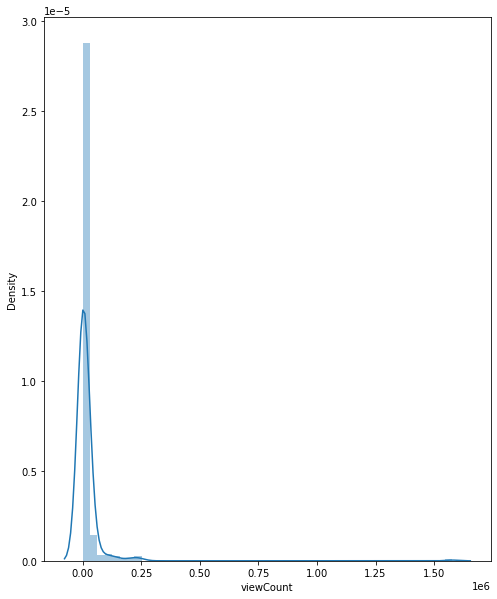

In [280]:
sns.distplot(ntu['viewCount'])

C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viewCount', ylabel='Density'>

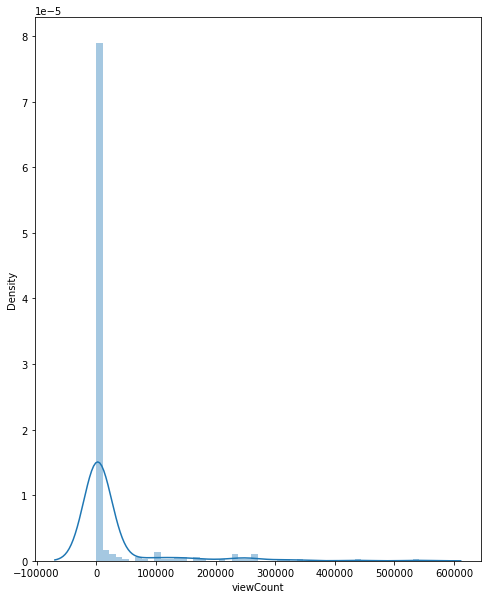

In [282]:
sns.distplot(sutd['viewCount'])

C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viewCount', ylabel='Density'>

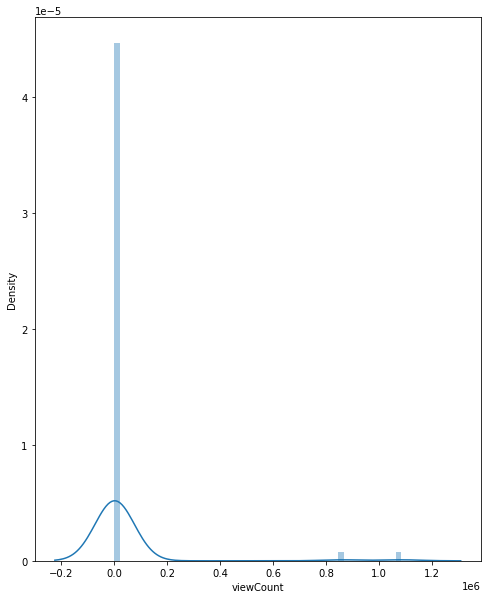

In [283]:
sns.distplot(sit['viewCount'])

C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

<AxesSubplot:xlabel='viewCount', ylabel='Density'>

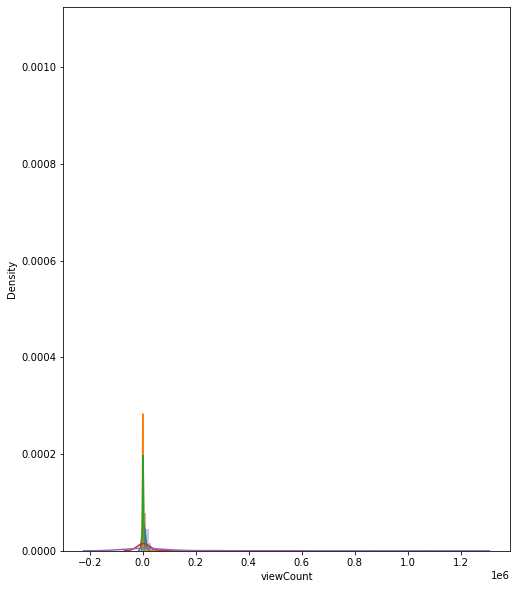

In [295]:
sns.distplot(ntu_scse['viewCount'])
sns.distplot(smu_scis['viewCount'])
# sns.distplot(smu['viewCount'])
# sns.distplot(nus['viewCount'])
sns.distplot(nus_computing['viewCount'])
# sns.distplot(ntu['viewCount'])
sns.distplot(sutd['viewCount'])
sns.distplot(sit['viewCount'])

C:\Anaconda_File\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda_File\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda_File\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda_File\lib\site-packages\seaborn\_decorators.

<AxesSubplot:xlabel='viewCount'>

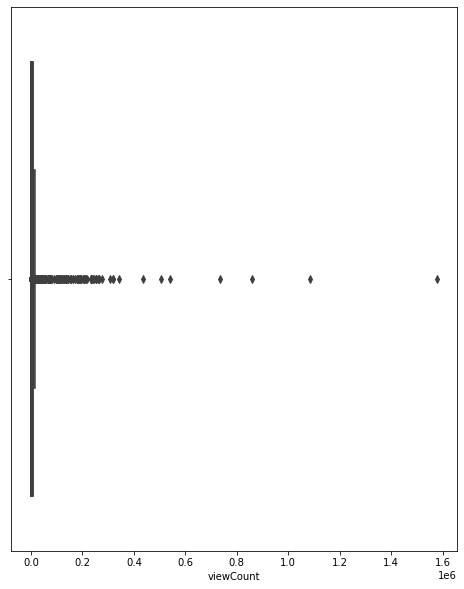

In [294]:
sns.boxplot(ntu_scse['viewCount'])
sns.boxplot(smu_scis['viewCount'])
sns.boxplot(smu['viewCount'])
sns.boxplot(nus['viewCount'])
sns.boxplot(nus_computing['viewCount'])
sns.boxplot(ntu['viewCount'])
sns.boxplot(sutd['viewCount'])
sns.boxplot(sit['viewCount'])

Attempt at NLP for "title" column

In [248]:
import nltk
from nltk.stem import WordNetLemmatizer
import sys
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.parse.malt import MaltParser
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Jun
[nltk_data]     Long\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jun Long\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Jun
[nltk_data]     Long\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jun
[nltk_data]     Long\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [252]:
titles = df3_dropna_processed.loc[:,'title']
titles

0       IS480: Final Year Projects (AY2013 -14 T2): Te...
1                                             B1G1 - Kyaw
2       IS480: Final Year Projects (AY2013 -14 T2): Te...
3                                         B1G1 - PyaeSone
4             IS480 (AY2014-15, T1): Team 1Platform Pitch
                              ...                        
2434    SIT Open House 2011 - The Culinary Institute o...
2435                  SIT Open House 2011 Admissions Talk
2436                       SIT Open House 2011 Highlights
2437    Dr Ting Seng Kiong, Deputy President (Academic...
2438             Professor Tan Chin Tiong, President, SIT
Name: title, Length: 2439, dtype: object

In [254]:
for k in range(len(titles)):
    # word tokenizer will keep the punctuations. To get rid of punctuations, use nltk.RegexpTokenizer(r'\w+').tokenize(sentences[k]) 
    words = nltk.word_tokenize(titles[k])
    print("Words in sentence "+repr(k+1)+" are: ")
    wordlist=[]
    for w in words:
        wordlist.append(w)
    print(wordlist)

Words in sentence 1 are: 
['IS480', ':', 'Final', 'Year', 'Projects', '(', 'AY2013', '-14', 'T2', ')', ':', 'Team', 'SkyTeam']
Words in sentence 2 are: 
['B1G1', '-', 'Kyaw']
Words in sentence 3 are: 
['IS480', ':', 'Final', 'Year', 'Projects', '(', 'AY2013', '-14', 'T2', ')', ':', 'Team', 'The', 'Partners']
Words in sentence 4 are: 
['B1G1', '-', 'PyaeSone']
Words in sentence 5 are: 
['IS480', '(', 'AY2014-15', ',', 'T1', ')', ':', 'Team', '1Platform', 'Pitch']
Words in sentence 6 are: 
['B1G1', '-', 'Yan']
Words in sentence 7 are: 
['IS480', '(', 'AY2017-18', ',', 'T1', ')', ':', 'Team', 'Citade']
Words in sentence 8 are: 
['IS480', ':', 'Final', 'Year', 'Projects', '(', 'AY2013', '-14', 'T2', ')', ':', 'Team', 'Newbility']
Words in sentence 9 are: 
['IS480', ':', 'Final', 'Year', 'Projects', '(', 'AY2013', '-14', 'T2', ')', ':', 'Team', 'Change', 'Makers']
Words in sentence 10 are: 
['IS480', ':', 'Final', 'Year', 'Projects', '(', 'AY2013', '-14', 'T2', ')', ':', 'Team', 'Five', '&'

Words in sentence 433 are: 
['IS306', '(', 'AY2013-14', 'Term', '1', ')', ':', 'G2T3', 'Team', "D'PENZ", '-', 'ING', 'Bank', "'s", 'Procurement', 'Workflow', 'Management', 'System']
Words in sentence 434 are: 
['Luxury', 'Seminar', 'Series', ':', 'The', 'Continuous', 'Consumer', 'By', 'Ian', 'Bellhouse', ',', 'CEO', '-', 'Asia', 'Pacific', ',', 'Fitch']
Words in sentence 435 are: 
['IS480', '(', 'AY2017-18', ',', 'T1', ')', ':', 'BunnyHop']
Words in sentence 436 are: 
['IS480', 'Poster', 'Day', '(', 'AY2013-14', ',', 'T2', ')', 'Highlights']
Words in sentence 437 are: 
['ABS-FITA', 'Technology', 'Risk', 'and', 'Security', 'MasterClass', '2015']
Words in sentence 438 are: 
['WYSIWYG', '01', '-', 'Charlie', "'s", 'Angels']
Words in sentence 439 are: 
['Social', 'iCon', '2016', ':', 'Nicolas', 'Ng', '(', 'SMU', '&', 'Children', 'of', 'Cambodia', ')']
Words in sentence 440 are: 
['CME', 'Speaker', 'Series', 'Seminar', '(', '15', 'September', '2016', ')', 'Justin', 'Halim', ',', 'Facebook']

['Kenneth', '’', 's', 'Best', 'Memories', 'of', 'SMU']
Words in sentence 892 are: 
['Inauguration', 'address', 'by', 'NTU', 'President', 'Bertil', 'Andersson', '(', 'Part', '2', ')']
Words in sentence 893 are: 
['Insider', 'Tips', 'for', 'Freshmen', '-', 'Benedict']
Words in sentence 894 are: 
['Innovation', 'and', 'Knowledge', 'Transfer', '-', 'A', 'Global', 'Perspective', 'and', 'the', 'Role', 'of', 'IKT']
Words in sentence 895 are: 
['Behind', 'the', 'Scenes', ':', 'Class', 'of', '2017', 'More', 'than', 'words']
Words in sentence 896 are: 
['SMU', 'Commencement', '2018', ':', 'Lee', 'Kong', 'Chian', 'School', 'of', 'Business', 'Undergraduate', 'Ceremony', '[', '3', 'of', '3', ']']
Words in sentence 897 are: 
['SIS', 'Commencement', '2019']
Words in sentence 898 are: 
['Celebrating', 'the', '10th', 'Anniversary', 'of', 'the', 'Lee', 'Foundation', 'Landmark', 'Gift', 'to', 'LKCSB', '–', 'Winston', 'Wu']
Words in sentence 899 are: 
['Professors', "'", 'Pastimes', '(', 'E2', ')', ':', '

['SMU', 'SIS', ':', 'What', 'we', 'do', 'and', 'how', 'we', 'do', 'it']
Words in sentence 1347 are: 
['NTU', 'Joint', 'Dance', 'Concert', '2017']
Words in sentence 1348 are: 
['NTU', 'Singapore', 'scientists', 'turn', 'ultra-tough', 'pollen', 'into', 'flexible', 'material']
Words in sentence 1349 are: 
['Contrarian']
Words in sentence 1350 are: 
['All', 'about', 'SMU', 'Labs']
Words in sentence 1351 are: 
['SMU', 'Commencement', '2019', ':', 'School', 'of', 'Economics', 'Undergraduate', 'Ceremony']
Words in sentence 1352 are: 
['Hot', 'spot', 'for', 'NTU', 'students', 'at', 'the', 'Student', 'Activities', 'Centre', 'and', 'Global', 'Lounge']
Words in sentence 1353 are: 
['Predictability', 'of', 'Asset', 'Returns', '&', 'the', 'Efficient', 'Market', 'Hypothesis', 'Part', '2/3']
Words in sentence 1354 are: 
['What', 'if', 'it', 'snows', 'at', 'the', 'Hive', 'at', 'NTU', 'Singapore', '?']
Words in sentence 1355 are: 
['Book', 'Launch', ':', 'Beyond', 'Storms', '&', 'Stars', '-', 'A', 'Mem

['The', 'Arc', 'of', 'learning', 'at', 'NTU', 'Singapore']
Words in sentence 1784 are: 
['SMU', 'Prinsep', 'Street', 'Residences', ':', 'My', 'PSR', 'Journey']
Words in sentence 1785 are: 
['#', 'TalentsOfSMU', ':', 'Amanda', 'Yeap', ',', 'National', 'Floorball', 'Athlete']
Words in sentence 1786 are: 
['NTU', 'Open', 'House', '2017']
Words in sentence 1787 are: 
['Explore', 'the', 'virtual', 'NTU', 'Open', 'House', '2021']
Words in sentence 1788 are: 
['#', 'TalentsOfSMU', ':', 'Jeremy', 'Lee', 'and', 'Clewyn', 'Phua', '–', 'From', 'Waste', 'to', 'Resource', 'with', 'UglyGood']
Words in sentence 1789 are: 
['Live', ',', 'work', 'and', 'play', 'at', 'NTU', '’', 's', 'new', 'Nanyang', 'Crescent', 'halls']
Words in sentence 1790 are: 
['Daw', 'Aung', 'San', 'Suu', 'Kyi', '-', 'SMU', 'HRH', 'Q', '&', 'A', '(', '22', 'Sep', '2013', ')']
Words in sentence 1791 are: 
['Cooking', 'with', 'Little', 'Miss', 'Bento', ':', 'How', 'to', 'make', 'a', 'cute', 'bento', 'box']
Words in sentence 1792 a

Words in sentence 2204 are: 
['SUTD', 'Graduation', 'Day', '2017']
Words in sentence 2205 are: 
['SUTD', 'Graduation', 'Day', '2017']
Words in sentence 2206 are: 
['SUTD', 'Graduation', 'Day', '2017']
Words in sentence 2207 are: 
['SUTD', 'Graduation', 'Day', '2017']
Words in sentence 2208 are: 
['SUTD', 'Graduation', 'Day', '2017']
Words in sentence 2209 are: 
['The', 'SUTD', 'Experience', '-', 'Class', 'of', '2017']
Words in sentence 2210 are: 
['Origami', 'Robots']
Words in sentence 2211 are: 
['SUTD', 'Open', 'House', '2017', '-', 'A', 'Better', 'World', 'by', 'Design']
Words in sentence 2212 are: 
['Engineering', 'Systems', 'and', 'Design', '(', 'ESD', ')', 'â€', '“', 'A', 'Gateway', 'Pillar', 'to', 'an', 'Exciting', 'Career']
Words in sentence 2213 are: 
['Why', 'did', 'our', 'alumni', 'and', 'students', 'choose', 'the', 'ISTD', 'pillar', '?']
Words in sentence 2214 are: 
['Hear', 'from', 'industry', 'leaders', 'and', 'learn', 'why', 'SUTD', 'is', 'unique', '.']
Words in sentence

In [255]:
for k in range(len(titles)):
    words = nltk.word_tokenize(titles[k])
    tagged_words = nltk.pos_tag(words)
    print("Tagged Words in sentence "+repr(k+1)+" are: ")
    print(tagged_words)

Tagged Words in sentence 1 are: 
[('IS480', 'NN'), (':', ':'), ('Final', 'JJ'), ('Year', 'NN'), ('Projects', 'NNS'), ('(', '('), ('AY2013', 'NNP'), ('-14', 'NNP'), ('T2', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('SkyTeam', 'NN')]
Tagged Words in sentence 2 are: 
[('B1G1', 'NNP'), ('-', ':'), ('Kyaw', 'NN')]
Tagged Words in sentence 3 are: 
[('IS480', 'NN'), (':', ':'), ('Final', 'JJ'), ('Year', 'NN'), ('Projects', 'NNS'), ('(', '('), ('AY2013', 'NNP'), ('-14', 'NNP'), ('T2', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('The', 'DT'), ('Partners', 'NNPS')]
Tagged Words in sentence 4 are: 
[('B1G1', 'NNP'), ('-', ':'), ('PyaeSone', 'NN')]
Tagged Words in sentence 5 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2014-15', 'NNP'), (',', ','), ('T1', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('1Platform', 'CD'), ('Pitch', 'NN')]
Tagged Words in sentence 6 are: 
[('B1G1', 'NNP'), ('-', ':'), ('Yan', 'NN')]
Tagged Words in sentence 7 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2017-18

Tagged Words in sentence 128 are: 
[('IS306', 'NNP'), ('(', '('), ('AY2013-14', 'JJ'), ('Term', 'NNP'), ('2', 'CD'), (')', ')'), (':', ':'), ('G2T4', 'NNP'), ('Team', 'NNP'), ('The', 'DT'), ('Mighty', 'NNP'), ('Morphin', 'NNP'), ('Money', 'NNP'), ('Rangers', 'NNP'), ('-', ':'), ('Lei', 'NNP'), ('Long', 'NNP'), ('Everything', 'NNP'), ('Must', 'NNP'), ('Go', 'NNP'), ('!', '.')]
Tagged Words in sentence 129 are: 
[('Lien', 'NNP'), ('Fung', 'NNP'), ("'s", 'POS'), ('Colloquium', 'NNP'), ('8', 'CD'), ('May', 'NNP'), ('2010', 'CD'), ('(', '('), ('Part', 'NNP'), ('5', 'CD'), (':', ':'), ('Q', 'NNP'), ('&', 'CC'), ('A', 'NNP'), (')', ')')]
Tagged Words in sentence 130 are: 
[('Social', 'NNP'), ('Icon', 'NNP'), ('2009', 'CD'), ('--', ':'), ('Inspiring', 'VBG'), ('Social', 'JJ'), ('Innovators', 'NNS'), ('(', '('), ('Panel', 'NNP'), ('Discussion', 'NNP'), (')', ')'), ('Part', 'VBD'), ('1', 'CD')]
Tagged Words in sentence 131 are: 
[('Social', 'NNP'), ('Icon', 'NNP'), ('2009', 'CD'), ('--', ':'), (

Tagged Words in sentence 258 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2018-19', 'NNP'), (',', ','), ('T1', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('Tempest', 'JJS')]
Tagged Words in sentence 259 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2017-18', 'NNP'), (',', ','), ('T2', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('XWGate', 'NN')]
Tagged Words in sentence 260 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2017-18', 'NNP'), (',', ','), ('T1', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('Elixir', 'NN')]
Tagged Words in sentence 261 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2017-18', 'NNP'), (',', ','), ('T1', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('Dev', 'NNP'), ('Ninjas', 'NNP')]
Tagged Words in sentence 262 are: 
[('CAREER', 'NNP'), ('COMPASS', 'NNP'), (':', ':'), ('An', 'DT'), ('enhanced', 'JJ'), ('undergraduate', 'JJ'), ('experience', 'NN'), ('at', 'IN'), ('the', 'DT'), ('NUS', 'NNP'), ('College', 'NNP'), ('of', 'IN'), ('Humanities', 'NNP'), ('and', 'CC'), ('Sc

Tagged Words in sentence 389 are: 
[('Inaugural', 'JJ'), ('ROSA', 'NNP'), ('Annual', 'NNP'), ('Symposium', 'NNP'), ('2021', 'CD'), (':', ':'), ('Enabling', 'VBG'), ('Older', 'JJR'), ('Adults', 'NNS'), ('to', 'TO'), ('Flourish', 'VB'), ('in', 'IN'), ('Phase', 'NNP'), ('Endemic', 'NNP')]
Tagged Words in sentence 390 are: 
[('LVMH', 'NNP'), ('SMU', 'NNP'), ('Luxury', 'NNP'), ('Research', 'NNP'), ('Conference', 'NNP'), ('2018', 'CD'), ('-', ':'), ('Presented', 'VBN'), ('by', 'IN'), ('Ms', 'NNP'), ('.', '.'), ('Pair', 'NNP'), ('Sajampun', 'NNP'), ('&', 'CC'), ('Ms.', 'NNP'), ('Ananya', 'NNP'), ('Phunthasaen', 'NNP')]
Tagged Words in sentence 391 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2018-19', 'NNP'), (',', ','), ('T1', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('Accounting', 'NNP'), ('Architects', 'NNS')]
Tagged Words in sentence 392 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2015-16', 'NNP'), (',', ','), ('T2', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('Friendchise', 'NN')]
T

Tagged Words in sentence 494 are: 
[('LVMH', 'NNP'), ('SMU', 'NNP'), ('Luxury', 'NNP'), ('Research', 'NNP'), ('Conference', 'NNP'), ('2018', 'CD'), ('-', ':'), ('Presented', 'VBN'), ('by', 'IN'), ('Ms.', 'NNP'), ('Susan', 'NNP'), ('Calderon', 'NNP')]
Tagged Words in sentence 495 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2019-20', 'NNP'), (',', ','), ('T1', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('RevoluTTwin', 'NNP')]
Tagged Words in sentence 496 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2015-16', 'NNP'), (',', ','), ('T2', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('Cambo', 'NNP')]
Tagged Words in sentence 497 are: 
[('CME', 'NNP'), ('Speaker', 'NNP'), ('Series', 'NNP'), ('(', '('), ('4', 'CD'), ('October', 'NNP'), ('2021', 'CD'), (')', ')'), (':', ':'), ('Samir', 'NNP'), ('Dixit', 'NNP'), (',', ','), ('Brand', 'NNP'), ('Finance', 'NNP'), ('Asia', 'NNP'), ('Pacific', 'NNP')]
Tagged Words in sentence 498 are: 
[('Passion', 'NN')]
Tagged Words in sentence 499 are: 
[('IS480

Tagged Words in sentence 618 are: 
[('SIS', 'NNP'), ('Offerees', 'NNP'), ('Tea', 'NNP'), ('2014', 'CD'), ('#', '#'), ('2', 'CD'), ('-', ':'), ('with', 'IN'), ('Current', 'NNP'), ('BSc', 'NNP'), ('(', '('), ('ISM', 'NNP'), (')', ')'), ('Students', 'NNS')]
Tagged Words in sentence 619 are: 
[('Saving', 'VBG'), ('energy', 'NN'), ('is', 'VBZ'), ('his', 'PRP$'), ('forte', 'NN')]
Tagged Words in sentence 620 are: 
[('Migrant', 'JJ'), ('Workers', 'NNP'), ('Awareness', 'NNP'), ('Week', 'NNP'), ('2016', 'CD')]
Tagged Words in sentence 621 are: 
[('IS480', 'NNP'), ('(', '('), ('AY2015-16', 'NNP'), (',', ','), ('T1', 'NNP'), (')', ')'), (':', ':'), ('Team', 'NN'), ('Clockwork', 'NNP'), ('Pitch', 'NNP')]
Tagged Words in sentence 622 are: 
[('Growing', 'VBG'), ('Global', 'NNP'), (':', ':'), ('Developing', 'NNP'), ('Talent', 'NNP'), (',', ','), ('Supporting', 'VBG'), ('Enterprises', 'NNS'), ('(', '('), ('I', 'PRP'), (')', ')')]
Tagged Words in sentence 623 are: 
[('11th', 'CD'), ('STePS', 'NNS'), ('

Tagged Words in sentence 746 are: 
[('The', 'DT'), ('SMU', 'NNP'), ('Masters', 'NNP'), ('Experience', 'NNP'), ('-', ':'), ('School', 'NN'), ('of', 'IN'), ('Accountancy', 'NNP')]
Tagged Words in sentence 747 are: 
[('LVMH-SMU', 'JJ'), ('Luxury', 'NNP'), ('Conference', 'NNP'), ('2021', 'CD'), ('Opening', 'NNP'), ('Remarks', 'NNP'), ('(', '('), ('9', 'CD'), ('June', 'NNP'), ('2021', 'CD'), (')', ')')]
Tagged Words in sentence 748 are: 
[('Genome', 'NNP'), ('research', 'NN'), ('by', 'IN'), ('NTU', 'NNP'), ('Singapore', 'NNP'), ('proves', 'VBZ'), ('diseases', 'NNS'), ('can', 'MD'), ('be', 'VB'), ('spread', 'VBN'), ('by', 'IN'), ('flies', 'NNS')]
Tagged Words in sentence 749 are: 
[('UOB-SMU', 'JJ'), ('AEI', 'NNP'), ('–', 'NNP'), ('Short', 'NNP'), ('Chat', 'NNP'), ('with', 'IN'), ('the', 'DT'), ('Boss', 'NNP'), (':', ':'), ('Nu', 'NNP'), ('.', '.'), ('Reflections', 'NNP'), ('Pte', 'NNP'), ('.', '.'), ('Ltd', 'NNP'), ('.', '.')]
Tagged Words in sentence 750 are: 
[('SMU', 'NNP'), ('PDLS', 'NN

Tagged Words in sentence 872 are: 
[('Vanishing', 'NN'), (':', ':'), ('The', 'DT'), ('Sumatran', 'NNP'), ('tigers', 'NNS')]
Tagged Words in sentence 873 are: 
[('SMU', 'NNP'), ('Commencement', 'NNP'), ('2018', 'CD'), (':', ':'), ('Lee', 'NNP'), ('Kong', 'NNP'), ('Chian', 'JJ'), ('School', 'NNP'), ('of', 'IN'), ('Business', 'NNP'), ('Postgraduate', 'NNP'), ('Ceremony', 'NNP'), ('[', 'VBD'), ('1', 'CD'), ('of', 'IN'), ('2', 'CD'), (']', 'NNS')]
Tagged Words in sentence 874 are: 
[('SMU', 'NNP'), ('Youth', 'NNP'), ('Innovation', 'NNP'), ('Challenge', 'NNP'), ('2014', 'CD'), ('-', ':'), ('Interview', 'NN'), ('with', 'IN'), ('participants', 'NNS')]
Tagged Words in sentence 875 are: 
[('SMU', 'NNP'), ('Lee', 'NNP'), ('Kong', 'NNP'), ('Chian', 'JJ'), ('School', 'NNP'), ('of', 'IN'), ('Business', 'NNP'), ('Postgraduate', 'NNP'), ('Virtual', 'NNP'), ('Commencement', 'NNP'), ('2021', 'CD'), ('Ceremony', 'NNP'), ('2', 'CD')]
Tagged Words in sentence 876 are: 
[('LIM', 'NNP'), ('Woon', 'NNP'), ('C

Tagged Words in sentence 1000 are: 
[('SMU', 'NNP'), ('Commencement', 'NNP'), ('2016', 'CD'), ('-', ':'), ('School', 'NN'), ('of', 'IN'), ('Information', 'NNP'), ('Systems', 'NNP'), ('Ceremony', 'NNP')]
Tagged Words in sentence 1001 are: 
[('The', 'DT'), ('Opportunities', 'NNP'), ('&', 'CC'), ('Challenges', 'NNP'), ('Facing', 'VBG'), ('the', 'DT'), ('Asset', 'NNP'), ('Management', 'NNP'), ('Industry', 'NNP'), ('in', 'IN'), ('Asia', 'NNP'), ('Part', 'NNP'), ('2/5', 'CD')]
Tagged Words in sentence 1002 are: 
[('LVMH', 'NNP'), ('SMU', 'NNP'), ('Luxury', 'NNP'), ('Research', 'NNP'), ('Conference', 'NNP'), ('2018', 'CD'), ('-', ':'), ('Presented', 'VBN'), ('by', 'IN'), ('Mr.', 'NNP'), ('Pritish', 'NNP'), ('Bhattacharya', 'NNP')]
Tagged Words in sentence 1003 are: 
[('@', 'JJ'), ('NTU_sg', 'NNP'), ('is', 'VBZ'), ('now', 'RB'), ('on', 'IN'), ('Instagram', 'NNP')]
Tagged Words in sentence 1004 are: 
[('Smart-City', 'NNP'), ('Management', 'NNP'), ('and', 'CC'), ('Technology', 'NNP'), ('Learning

Tagged Words in sentence 1124 are: 
[('Youth', 'NNP'), ('Innovation', 'NNP'), ('Challenge', 'NNP'), ('2015', 'CD'), ('–', 'VBD'), ('The', 'DT'), ('Journey', 'NNP')]
Tagged Words in sentence 1125 are: 
[('SMU', 'NNP'), ('School', 'NNP'), ('of', 'IN'), ('Economics', 'NNP'), ('Undergraduate', 'NNP'), ('Ceremony', 'NNP'), ('2', 'CD'), ('and', 'CC'), ('Postgraduate', 'NNP'), ('Ceremony', 'NNP')]
Tagged Words in sentence 1126 are: 
[('Teaching', 'VBG'), ('innovations', 'NNS'), ('at', 'IN'), ('SMU', 'NNP'), ('--', ':'), ('Assistant', 'NNP'), ('Professor', 'NNP'), ('Jason', 'NNP'), ('Woodard', 'NNP')]
Tagged Words in sentence 1127 are: 
[('My', 'PRP$'), ('Journey', 'NNP'), ('in', 'IN'), ('SMU-SIS', 'NNP'), (':', ':'), ('Si', 'NNP'), ('Min', 'NNP')]
Tagged Words in sentence 1128 are: 
[('Innovators', 'NNS'), ('&', 'CC'), ('Entrepreneurs', 'NNP'), ('Lecture', 'NNP'), ('Series', 'NNP'), ('by', 'IN'), ('Edward', 'NNP'), ('Chia', 'NNP'), (',', ','), ('Co-Founder', 'NNP'), ('of', 'IN'), ('Timbre', '

Tagged Words in sentence 1245 are: 
[('The', 'DT'), ('MPA', 'NNP'), ('Experience', 'NNP'), ('–', 'NNP'), ('MPA', 'NNP'), ('Opens', 'NNP'), ('Up', 'IN'), ('a', 'DT'), ('World', 'NNP'), ('of', 'IN'), ('Opportunity', 'NNP')]
Tagged Words in sentence 1246 are: 
[('Another', 'DT'), ('step', 'NN'), ('closer', 'RBR'), ('to', 'TO'), ('wearable', 'JJ'), ('technology', 'NN'), ('with', 'IN'), ('this', 'DT'), ('flexible', 'JJ'), ('supercapacitor', 'NN'), ('from', 'IN'), ('NTU', 'NNP'), ('Singapore', 'NNP')]
Tagged Words in sentence 1247 are: 
[('NTU', 'NNP'), ('Singapore', 'NNP'), ('-', ':'), ('CEA', 'NNP'), ('joint', 'JJ'), ('research', 'NN'), ('centre', 'NN'), ('to', 'TO'), ('develop', 'VB'), ('innovative', 'JJ'), ('e-waste', 'NN'), ('recycling', 'NN'), ('technologies', 'NNS')]
Tagged Words in sentence 1248 are: 
[('Self-made', 'JJ'), ('smartphone', 'NN'), ('video', 'NN'), ('by', 'IN'), ('NTU', 'NNP'), ('alumnus', 'NN')]
Tagged Words in sentence 1249 are: 
[('SMU', 'NNP'), ('Commencement', 'NNP'

Tagged Words in sentence 1372 are: 
[('Top', 'JJ'), ('Highlights', 'NNS'), ('from', 'IN'), ('SMU', 'NNP'), ('Masters', 'NNP'), ('Day', 'NNP'), ('2019', 'CD'), ('on', 'IN'), ('28', 'CD'), ('September', 'NNP'), ('!', '.')]
Tagged Words in sentence 1373 are: 
[('Innovators', 'NNS'), ('&', 'CC'), ('Entrepreneurs', 'NNP'), ('Lecture', 'NNP'), ('Series', 'NNP'), ('by', 'IN'), ('Daniel', 'NNP'), ('Lim', 'NNP'), (',', ','), ('Co-Founder', 'NNP'), ('of', 'IN'), ('Reebonz', 'NNP')]
Tagged Words in sentence 1374 are: 
[('The', 'DT'), ('Entrepreneurial', 'NNP'), ('Journey', 'NNP'), ('(', '('), ('Gaetan', 'NNP'), ('de', 'NNP'), ('Dietrich', 'NNP'), (',', ','), ('Riot', 'NNP'), ('&', 'CC'), ('Rick', 'NNP'), ('Tan', 'NNP'), (',', ','), ('Innova', 'NNP'), ('Technology', 'NNP'), (')', ')')]
Tagged Words in sentence 1375 are: 
[('SMU', 'NNP'), ('Senior', 'NNP'), ('Class', 'NNP'), ('Gift', 'NNP'), ('2013', 'CD')]
Tagged Words in sentence 1376 are: 
[('The', 'DT'), ('Exciting', 'NNP'), ('Journey', 'NNP'),

Tagged Words in sentence 1503 are: 
[('SMU', 'NNP'), ('Alumni', 'NNP'), ('Showcase', 'NNP'), (':', ':'), ('The', 'DT'), ('Power', 'NNP'), ('of', 'IN'), ('Giving', 'NNP'), ('Back', 'NNP')]
Tagged Words in sentence 1504 are: 
[('SMU', 'NNP'), ('Yong', 'NNP'), ('Pung', 'NNP'), ('How', 'NNP'), ('School', 'NNP'), ('of', 'IN'), ('Law', 'NNP'), ('Postgraduate', 'NNP'), ('and', 'CC'), ('Undergraduate', 'NNP'), ('Virtual', 'NNP'), ('Commencement', 'NNP'), ('2021', 'CD'), ('Ceremony', 'NNP')]
Tagged Words in sentence 1505 are: 
[('SMU', 'NNP'), ('Remembers', 'NNP'), ('Mr', 'NNP'), ('Lee', 'NNP'), ('Kuan', 'NNP'), ('Yew', 'NNP')]
Tagged Words in sentence 1506 are: 
[('SMU', 'NNP'), ('IIE', 'NNP'), ('Global', 'NNP'), ('Innovation', 'NNP'), ('Immersion', 'NNP'), ('(', '('), ('GII', 'NNP'), (')', ')'), ('programme', 'NN')]
Tagged Words in sentence 1507 are: 
[('Undergrads', 'NNS'), ('from', 'IN'), ('NTU', 'NNP'), ('Singapore', 'NNP'), ('bring', 'NN'), ('fresh', 'JJ'), ('water', 'NN'), ('to', 'TO'), 

Tagged Words in sentence 1639 are: 
[('Management', 'NN'), ('of', 'IN'), ('Renewable', 'NNP'), ('Energy', 'NNP'), ('|', 'NNP'), ('SMU', 'NNP'), ('Research', 'NNP')]
Tagged Words in sentence 1640 are: 
[('SMU', 'NNP'), ('Master', 'NNP'), ('of', 'IN'), ('Science', 'NNP'), ('in', 'IN'), ('Communication', 'NNP'), ('Management', 'NNP')]
Tagged Words in sentence 1641 are: 
[('Award-winning', 'JJ'), ('animation', 'NN'), ('by', 'IN'), ('NTU', 'NNP'), ('and', 'CC'), ('Jose', 'NNP'), ('Velasco', 'NNP')]
Tagged Words in sentence 1642 are: 
[('How', 'WRB'), ('to', 'TO'), ('be', 'VB'), ('a', 'DT'), ('superhero', 'NN')]
Tagged Words in sentence 1643 are: 
[('NTU', 'NNP'), ("'s", 'POS'), ('new', 'JJ'), ('loo', 'NN'), ('turns', 'VBZ'), ('poo', 'RB'), ('into', 'IN'), ('power', 'NN')]
Tagged Words in sentence 1644 are: 
[('Memorial', 'JJ'), ('Ceremony', 'NNP'), ('at', 'IN'), ('NTU', 'NNP'), ('for', 'IN'), ('Mr', 'NNP'), ('Lee', 'NNP'), ('Kuan', 'NNP'), ('Yew', 'NNP')]
Tagged Words in sentence 1645 are: 

Tagged Words in sentence 1780 are: 
[('Kwanpen-IIE', 'NNP'), ('Startup', 'NNP'), ('AMA', 'NNP'), ('–', 'NNP'), ('Mar', 'NNP'), ('2018', 'CD'), ('with', 'IN'), ('Kevin', 'NNP'), ('Aluwi', 'NNP'), (',', ','), ('Co-Founder', 'NNP'), (',', ','), ('GO-JEK', 'NNP'), ('Indonesia', 'NNP')]
Tagged Words in sentence 1781 are: 
[('This', 'DT'), ('is', 'VBZ'), ('SMU', 'NNP')]
Tagged Words in sentence 1782 are: 
[('10', 'CD'), ('Tips', 'NNP'), ('to', 'TO'), ('a', 'DT'), ('Smooth', 'NNP'), ('Exam', 'NNP')]
Tagged Words in sentence 1783 are: 
[('The', 'DT'), ('Arc', 'NNP'), ('of', 'IN'), ('learning', 'VBG'), ('at', 'IN'), ('NTU', 'NNP'), ('Singapore', 'NNP')]
Tagged Words in sentence 1784 are: 
[('SMU', 'NNP'), ('Prinsep', 'NNP'), ('Street', 'NNP'), ('Residences', 'NNS'), (':', ':'), ('My', 'PRP$'), ('PSR', 'NNP'), ('Journey', 'NNP')]
Tagged Words in sentence 1785 are: 
[('#', '#'), ('TalentsOfSMU', 'NN'), (':', ':'), ('Amanda', 'NNP'), ('Yeap', 'NNP'), (',', ','), ('National', 'NNP'), ('Floorball', 

Tagged Words in sentence 1920 are: 
[('Sun', 'NNP'), ('Soon', 'NNP'), ('offers', 'VBZ'), ('insights', 'NNS'), ('on', 'IN'), ('his', 'PRP$'), ('adventures', 'NNS'), (',', ','), ('both', 'DT'), ('in', 'IN'), ('Silk', 'NNP'), ('Road', 'NNP'), ('and', 'CC'), ('in', 'IN'), ('SMU', 'NNP'), ('.', '.')]
Tagged Words in sentence 1921 are: 
[('My', 'PRP$'), ('Journey', 'NNP'), ('of', 'IN'), ('Transformation', 'NNP'), (':', ':'), ('Nandeesh', 'NNP'), ('Valluvan', 'NNP'), (',', ','), ('SMU', 'NNP'), ('School', 'NNP'), ('of', 'IN'), ('Law', 'NNP')]
Tagged Words in sentence 1922 are: 
[('Yusri', 'NNP'), ('takes', 'VBZ'), ('us', 'PRP'), ('through', 'IN'), ('his', 'PRP$'), ('Europe', 'NNP'), ('exchange', 'NN'), ('and', 'CC'), ('the', 'DT'), ('SMU', 'NNP'), ('way', 'NN'), ('of', 'IN'), ('learning', 'VBG')]
Tagged Words in sentence 1923 are: 
[('Graduates', 'NNS'), ('sum', 'VBP'), ('up', 'RP'), ('their', 'PRP$'), ('SMU', 'NNP'), ('experience', 'NN'), ('&', 'CC'), ('share', 'NN'), ('real', 'JJ'), ('world

Tagged Words in sentence 2056 are: 
[('11th', 'CD'), ('STePS', 'NNS'), (':', ':'), ('SoC', 'NNP'), ('Term', 'NNP'), ('Project', 'NNP'), ('Showcase', 'NNP')]
Tagged Words in sentence 2057 are: 
[('2017', 'CD'), ('Sumobot', 'NNP'), ('Contest', 'NNP')]
Tagged Words in sentence 2058 are: 
[('Behind', 'IN'), ('the', 'DT'), ('Scenes', 'NNS'), (':', ':'), ('Class', 'NN'), ('of', 'IN'), ('2017', 'CD'), ('More', 'JJR'), ('than', 'IN'), ('words', 'NNS')]
Tagged Words in sentence 2059 are: 
[('Class', 'NN'), ('of', 'IN'), ('2017', 'CD'), (':', ':'), ('More', 'JJR'), ('than', 'IN'), ('words', 'NNS')]
Tagged Words in sentence 2060 are: 
[('Why', 'WRB'), ('NUS', 'NNP'), ('Computing', 'NNP'), ('?', '.')]
Tagged Words in sentence 2061 are: 
[('Professors', 'NNS'), ("'", 'POS'), ('Pastimes', 'NNS'), ('(', '('), ('E5', 'NNP'), (')', ')'), (':', ':'), ('Michael', 'NNP')]
Tagged Words in sentence 2062 are: 
[('Profs', 'NNP'), ("'", 'POS'), ('Pastimes', 'NNP'), ('(', '('), ('E4', 'NNP'), (')', ')'), (':', 

Tagged Words in sentence 2195 are: 
[('Women', 'NNS'), ('make', 'VBP'), ('life', 'NN'), ('better', 'RBR'), ('I', 'PRP'), ('Series', 'VBP'), ('1', 'CD')]
Tagged Words in sentence 2196 are: 
[('The', 'DT'), ('future', 'NN'), ('is', 'VBZ'), ('yours', 'RB'), ('to', 'TO'), ('create', 'VB'), ('-', ':'), ('How', 'WRB'), ('we', 'PRP'), ('live', 'VBP')]
Tagged Words in sentence 2197 are: 
[('The', 'DT'), ('future', 'NN'), ('is', 'VBZ'), ('yours', 'RB'), ('to', 'TO'), ('create', 'VB'), ('-', ':'), ('How', 'WRB'), ('we', 'PRP'), ('communicate', 'VBP')]
Tagged Words in sentence 2198 are: 
[('The', 'DT'), ('future', 'NN'), ('is', 'VBZ'), ('yours', 'RB'), ('to', 'TO'), ('create', 'VB'), ('-', ':'), ('How', 'WRB'), ('we', 'PRP'), ('live', 'VBP')]
Tagged Words in sentence 2199 are: 
[('The', 'DT'), ('future', 'NN'), ('is', 'VBZ'), ('yours', 'RB'), ('to', 'TO'), ('create', 'VB'), ('-', ':'), ('How', 'WRB'), ('we', 'PRP'), ('travel', 'VBP')]
Tagged Words in sentence 2200 are: 
[('The', 'DT'), ('future',

Tagged Words in sentence 2329 are: 
[('IDC', 'NNP'), ('Robocon', 'NNP'), ('2011', 'CD'), (':', ':'), ('Brazil', 'NNP'), ('Team', 'NNP'), ('-', ':'), ('Dance', 'NN')]
Tagged Words in sentence 2330 are: 
[('IDC', 'NNP'), ('Robocon', 'NNP'), ('2011', 'CD'), (':', ':'), ('Another', 'DT'), ('video', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Finals', 'NNS')]
Tagged Words in sentence 2331 are: 
[('IDC', 'NNP'), ('Robocon', 'NNP'), ('2011', 'CD'), (':', ':'), ('Brown', 'NNP'), ('Team', 'NNP'), ("'s", 'POS'), ('balloon', 'NN'), ('robot', 'NN'), ('in', 'IN'), ('action', 'NN')]
Tagged Words in sentence 2332 are: 
[('IDC', 'NNP'), ('Robocon', 'NNP'), ('2011', 'CD'), (':', ':'), ('Jin', 'NNP'), ('Kai', 'NNP'), ("'s", 'POS'), ('surprise', 'NN'), ('birthday', 'NN'), ('celebration', 'NN')]
Tagged Words in sentence 2333 are: 
[('IDC', 'NNP'), ('Robocon', 'NNP'), ('2011', 'CD'), (':', ':'), ('Team', 'NNP'), ('Brown', 'NNP'), ("'s", 'POS'), ('thank', 'NN'), ('you', 'PRP'), ('speech', 'VBP')]
Tagged Words in 

In [256]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
    
wordnet_lemmatizer = WordNetLemmatizer()
for k in range(len(titles)):
    words = nltk.word_tokenize(titles[k])
    tagged_words = nltk.pos_tag(words)
    lemmatized_wordlist=[]
    print("Word:Lemmatized Word in sentence "+repr(k+1)+" are: ")
    for w in tagged_words:
        wordnettag=get_wordnet_pos(w[1])
        if wordnettag == '':
            lemmatizedword = wordnet_lemmatizer.lemmatize(w[0].lower())
        else:
            lemmatizedword = wordnet_lemmatizer.lemmatize(w[0].lower(),pos=wordnettag)
        if w[0].istitle():
            lemmatizedword = lemmatizedword.capitalize()
        elif w[0].upper()==w[0]:
            lemmatizedword = lemmatizedword.upper()
        else:
            lemmatizedword = lemmatizedword
        lemmatized_wordlist.append((w[0],lemmatizedword))
            
    print(lemmatized_wordlist)

Word:Lemmatized Word in sentence 1 are: 
[('IS480', 'IS480'), (':', ':'), ('Final', 'Final'), ('Year', 'Year'), ('Projects', 'Project'), ('(', '('), ('AY2013', 'AY2013'), ('-14', '-14'), ('T2', 'T2'), (')', ')'), (':', ':'), ('Team', 'Team'), ('SkyTeam', 'skyteam')]
Word:Lemmatized Word in sentence 2 are: 
[('B1G1', 'B1g1'), ('-', '-'), ('Kyaw', 'Kyaw')]
Word:Lemmatized Word in sentence 3 are: 
[('IS480', 'IS480'), (':', ':'), ('Final', 'Final'), ('Year', 'Year'), ('Projects', 'Project'), ('(', '('), ('AY2013', 'AY2013'), ('-14', '-14'), ('T2', 'T2'), (')', ')'), (':', ':'), ('Team', 'Team'), ('The', 'The'), ('Partners', 'Partner')]
Word:Lemmatized Word in sentence 4 are: 
[('B1G1', 'B1g1'), ('-', '-'), ('PyaeSone', 'pyaesone')]
Word:Lemmatized Word in sentence 5 are: 
[('IS480', 'IS480'), ('(', '('), ('AY2014-15', 'AY2014-15'), (',', ','), ('T1', 'T1'), (')', ')'), (':', ':'), ('Team', 'Team'), ('1Platform', '1platform'), ('Pitch', 'Pitch')]
Word:Lemmatized Word in sentence 6 are: 
[(

Word:Lemmatized Word in sentence 122 are: 
[('IS306', 'IS306'), ('(', '('), ('AY2013-14', 'AY2013-14'), ('Term', 'Term'), ('1', '1'), (')', ')'), (':', ':'), ('G2T9', 'G2t9'), ('Team', 'Team'), ('mAjors', 'major'), ('-', '-'), ('Tasky', 'Tasky')]
Word:Lemmatized Word in sentence 123 are: 
[('CAREER', 'CAREER'), ('COMPASS', 'COMPASS'), (':', ':'), ('All', 'All'), ('you', 'you'), ('need', 'need'), ('to', 'to'), ('know', 'know'), ('about', 'about'), ('the', 'the'), ('new', 'new'), ('NUS', 'NU'), ('College', 'College')]
Word:Lemmatized Word in sentence 124 are: 
[('IS480', 'IS480'), ('(', '('), ('AY2016-17', 'AY2016-17'), (',', ','), ('T1', 'T1'), (')', ')'), (':', ':'), ('Team', 'Team'), ('Vatican', 'Vatican'), ('Cameos', 'Cameo')]
Word:Lemmatized Word in sentence 125 are: 
[('IS480', 'IS480'), ('Poster', 'Poster'), ('Day', 'Day'), ('(', '('), ('AY2013-14', 'AY2013-14'), (',', ','), ('T2', 'T2'), (')', ')'), ('Award', 'Award'), ('#', '#'), ('7', '7'), (':', ':'), ('Excelente', 'Excelente'

Word:Lemmatized Word in sentence 240 are: 
[('IS480', 'IS480'), ('(', '('), ('AY2016-17', 'AY2016-17'), ('T2', 'T2'), (')', ')'), (':', ':'), ('Team', 'Team'), ('smART', 'smart')]
Word:Lemmatized Word in sentence 241 are: 
[('IS480', 'IS480'), ('(', '('), ('AY2014-15', 'AY2014-15'), (',', ','), ('T2', 'T2'), (')', ')'), (':', ':'), ('Team', 'Team'), ('Insta-Coders', 'Insta-coders'), ('Pitch', 'Pitch')]
Word:Lemmatized Word in sentence 242 are: 
[('IS480', 'IS480'), ('Poster', 'Poster'), ('Day', 'Day'), ('(', '('), ('AY2013-14', 'AY2013-14'), (',', ','), ('T2', 'T2'), (')', ')'), ('Award', 'Award'), ('#', '#'), ('8', '8'), (':', ':'), ('Zora', 'Zora')]
Word:Lemmatized Word in sentence 243 are: 
[('Making', 'Make'), ('IT', 'IT'), ('Happen', 'Happen')]
Word:Lemmatized Word in sentence 244 are: 
[('IS480', 'IS480'), ('(', '('), ('AY2017-18', 'AY2017-18'), (',', ','), ('T1', 'T1'), (')', ')'), (':', ':'), ('Team', 'Team'), ('Incognito', 'Incognito'), ('Muffins', 'Muffin')]
Word:Lemmatized W

Word:Lemmatized Word in sentence 365 are: 
[('IS480', 'IS480'), ('Poster', 'Poster'), ('Day', 'Day'), ('(', '('), ('AY2015-16', 'AY2015-16'), (',', ','), ('T2', 'T2'), (')', ')'), ('Award', 'Award'), ('Winners', 'Winner'), ('Interview', 'Interview'), (':', ':'), ('Team', 'Team'), ('Technical', 'Technical'), ('Advantage', 'Advantage')]
Word:Lemmatized Word in sentence 366 are: 
[('IS306', 'IS306'), ('(', '('), ('AY2013-14', 'AY2013-14'), ('Term', 'Term'), ('1', '1'), (')', ')'), (':', ':'), ('G2T4', 'G2t4'), ('Team', 'Team'), ('YOLO', 'YOLO'), ('-', '-'), ('Bill', 'Bill'), ('Splitter', 'Splitter')]
Word:Lemmatized Word in sentence 367 are: 
[('IS306', 'IS306'), ('(', '('), ('AY2013-14', 'AY2013-14'), ('Term', 'Term'), ('2', '2'), (')', ')'), (':', ':'), ('G3T2', 'G3t2'), ('Team', 'Team'), ('Foodie', 'Foodie'), ('-', '-'), ('CooKey', 'cookey')]
Word:Lemmatized Word in sentence 368 are: 
[('IS306', 'IS306'), ('(', '('), ('AY2013-14', 'AY2013-14'), ('Term', 'Term'), ('2', '2'), (')', ')'),

Word:Lemmatized Word in sentence 485 are: 
[('Photo', 'Photo'), ('Montage', 'Montage'), ('Video', 'Video'), ('for', 'for'), ('SMU', 'SMU'), ('Commencement', 'Commencement'), ('2018', '2018')]
Word:Lemmatized Word in sentence 486 are: 
[('IS480', 'IS480'), ('(', '('), ('AY2015-16', 'AY2015-16'), (',', ','), ('T1', 'T1'), (')', ')'), (':', ':'), ('Team', 'Team'), ('Vantage', 'Vantage'), ('Pitch', 'Pitch')]
Word:Lemmatized Word in sentence 487 are: 
[('Benjamin', 'Benjamin'), ('Gan', 'Gan'), (',', ','), ('Supervisor', 'Supervisor')]
Word:Lemmatized Word in sentence 488 are: 
[('IS427', 'IS427'), ('Technopreneurship', 'Technopreneurship'), ('Study', 'Study'), ('Mission', 'Mission'), ('--', '--'), ('Europe', 'Europe'), ('(', '('), ('Academic', 'Academic'), ('Year', 'Year'), ('2013-14', '2013-14'), ('-', '-'), ('Term', 'Term'), ('1', '1'), (')', ')')]
Word:Lemmatized Word in sentence 489 are: 
[('Voices', 'Voice'), ('of', 'of'), ('SIS', 'SI'), (':', ':'), ('What', 'What'), ('did', 'do'), ('y

Word:Lemmatized Word in sentence 601 are: 
[('MITB-FS', 'MITB-FS'), (':', ':'), ('A', 'A'), ('Career', 'Career'), ('in', 'in'), ('Financial', 'Financial'), ('Services', 'Service'), ('Technology', 'Technology'), ('&', '&'), ('Operations', 'Operation'), ('(', '('), ('T', 'T'), ('&', '&'), ('O', 'O'), (')', ')'), ('Can', 'Can'), ('Be', 'Be'), ('Rewarding', 'Reward')]
Word:Lemmatized Word in sentence 602 are: 
[('LVMH', 'LVMH'), ('SMU', 'SMU'), ('Luxury', 'Luxury'), ('Research', 'Research'), ('Conference', 'Conference'), ('2018', '2018'), ('-', '-'), ('Presented', 'Present'), ('by', 'by'), ('Ms.', 'Ms.'), ('Jill', 'Jill'), ('Xiong', 'Xiong')]
Word:Lemmatized Word in sentence 603 are: 
[('MITB-FS', 'MITB-FS'), (':', ':'), ('Growing', 'Grow'), ('With', 'With'), ('Hardwork', 'Hardwork'), ('and', 'and'), ('Persistence', 'Persistence')]
Word:Lemmatized Word in sentence 604 are: 
[('CME', 'CME'), ('Speaker', 'Speaker'), ('Series', 'Series'), ('(', '('), ('28', '28'), ('August', 'August'), ('2019

Word:Lemmatized Word in sentence 701 are: 
[('Biggest', 'Biggest'), ('Challenge', 'Challenge'), ('of', 'of'), ('Authentic', 'Authentic'), ('Leadership', 'Leadership'), ('-', '-'), ('Conversations', 'Conversation'), ('with', 'with'), ('Nick', 'Nick'), ('Craig', 'Craig')]
Word:Lemmatized Word in sentence 702 are: 
[('2015', '2015'), ('Commencement', 'Commencement'), ('Clip', 'Clip'), ('Ooi', 'Ooi'), ('Wei', 'Wei'), ('Tsang', 'Tsang')]
Word:Lemmatized Word in sentence 703 are: 
[('Creating', 'Create'), ('Our', 'Our'), ('Digital', 'Digital'), ('Future', 'Future'), ('(', '('), ('Produced', 'Produce'), ('in', 'in'), ('August', 'August'), ('2020', '2020'), (')', ')')]
Word:Lemmatized Word in sentence 704 are: 
[('Professor', 'Professor'), ('Robert', 'Robert'), ('Deng', 'Deng'), ('talking', 'talk'), ('about', 'about'), ('the', 'the'), ('AXA', 'AXA'), ('Chair', 'Chair'), ('Professorship', 'Professorship'), ('of', 'of'), ('Cybersecurity', 'Cybersecurity')]
Word:Lemmatized Word in sentence 705 ar

Word:Lemmatized Word in sentence 819 are: 
[('Lyon', 'Lyon'), ('on', 'on'), ('Telegram', 'Telegram')]
Word:Lemmatized Word in sentence 820 are: 
[('2017', '2017'), ('Sumobot', 'Sumobot'), ('Contest', 'Contest')]
Word:Lemmatized Word in sentence 821 are: 
[('SMU', 'SMU'), ('SIS', 'SI'), ('Founding', 'Founding'), ('Dean', 'Dean'), ("'s", "'s"), ('Message', 'Message'), ('to', 'to'), ('Undergraduates', 'Undergraduate'), ('2016', '2016')]
Word:Lemmatized Word in sentence 822 are: 
[('SMU', 'SMU'), ('Patron', 'Patron'), ('’', '’'), ('s', 's'), ('Day', 'Day'), ('2019', '2019'), (':', ':'), ('All', 'All'), ('the', 'the'), ('Highlights', 'Highlight')]
Word:Lemmatized Word in sentence 823 are: 
[('UOB-SMU', 'UOB-SMU'), ('AEI', 'AEI'), ('–', '–'), ('Buan', 'Buan'), ('Seng', 'Seng'), ('Boon', 'Boon'), ('Kee', 'Kee')]
Word:Lemmatized Word in sentence 824 are: 
[('Artificial', 'Artificial'), ('Intelligence', 'Intelligence'), ('–', '–'), ('Are', 'Are'), ('You', 'You'), ('Ready', 'Ready'), ('?', '?'),

Word:Lemmatized Word in sentence 937 are: 
[('Bacteria', 'Bacteria'), ('and', 'and'), ('fungi', 'fungi'), ('show', 'show'), ('a', 'a'), ('precise', 'precise'), ('daily', 'daily'), ('rhythm', 'rhythm'), ('in', 'in'), ('tropical', 'tropical'), ('air', 'air'), (',', ','), ('finds', 'find'), ('NTU', 'NTU'), ('Singapore', 'Singapore'), ('study', 'study')]
Word:Lemmatized Word in sentence 938 are: 
[('Dino', 'Dino'), ('at', 'at'), ('NTU', 'NTU')]
Word:Lemmatized Word in sentence 939 are: 
[('UOB-SMU', 'UOB-SMU'), ('AEI', 'AEI'), ('–', '–'), ('Hi-Beau', 'Hi-beau'), ('Group', 'Group')]
Word:Lemmatized Word in sentence 940 are: 
[('Score', 'Score'), ('with', 'with'), ('these', 'these'), ('super', 'super'), ('boosters', 'booster')]
Word:Lemmatized Word in sentence 941 are: 
[('UOB-SMU', 'UOB-SMU'), ('AEI', 'AEI'), ('–', '–'), ('iAremyhair', 'iaremyhair')]
Word:Lemmatized Word in sentence 942 are: 
[('LVMH', 'LVMH'), ('SMU', 'SMU'), ('Luxury', 'Luxury'), ('Research', 'Research'), ('Conference', '

Word:Lemmatized Word in sentence 1050 are: 
[('How', 'How'), ('to', 'to'), ('Prepare', 'Prepare'), ('For', 'For'), ('Your', 'Your'), ('First', 'First'), ('Day', 'Day'), ('at', 'at'), ('SMU', 'SMU'), (':', ':'), ('The', 'The'), ('Supplies', 'Supply'), ('|', '|'), ('#', '#'), ('SMUggerTips', 'smuggertips')]
Word:Lemmatized Word in sentence 1051 are: 
[('UOB-SMU', 'UOB-SMU'), ('AEI', 'AEI'), ('–', '–'), ('Short', 'Short'), ('Chat', 'Chat'), ('with', 'with'), ('the', 'the'), ('Boss', 'Bos'), (':', ':'), ('Shermay', 'Shermay'), ('’', '’'), ('s', 's'), ('Singapore', 'Singapore'), ('Fine', 'Fine'), ('Food', 'Food')]
Word:Lemmatized Word in sentence 1052 are: 
[('The', 'The'), ('Opportunities', 'Opportunity'), ('&', '&'), ('Challenges', 'Challenge'), ('Facing', 'Face'), ('the', 'the'), ('Asset', 'Asset'), ('Management', 'Management'), ('Industry', 'Industry'), ('in', 'in'), ('Asia', 'Asia'), ('Part', 'Part'), ('1/5', '1/5')]
Word:Lemmatized Word in sentence 1053 are: 
[('Inauguration', 'Inaugu

Word:Lemmatized Word in sentence 1170 are: 
[('SMU', 'SMU'), ('EMBA', 'EMBA'), ('Graduate', 'Graduate'), (',', ','), ('Manish', 'Manish'), ('on', 'on'), ("'learning", "'learning"), ('from', 'from'), ('the', 'the'), ('best', 'best'), ("'", "'"), ('.', '.')]
Word:Lemmatized Word in sentence 1171 are: 
[('Security', 'Security'), ('Risk', 'Risk'), ('of', 'of'), ('IT', 'IT'), ('Outsourcing', 'Outsourcing')]
Word:Lemmatized Word in sentence 1172 are: 
[('SMU', 'SMU'), ('PDLS', 'PDL'), (':', ':'), ('The', 'The'), ('Digital', 'Digital'), ('Cities', 'City'), ('of', 'of'), ('the', 'the'), ('Future', 'Future'), (':', ':'), ('How', 'How'), ('can', 'can'), ('we', 'we'), ('embrace', 'embrace'), (',', ','), ('engage', 'engage'), ('and', 'and'), ('thrive', 'thrive'), ('?', '?')]
Word:Lemmatized Word in sentence 1173 are: 
[('UOB-SMU', 'UOB-SMU'), ('MSA', 'MSA'), ('Scholarship', 'Scholarship'), ('–', '–'), ('Leading', 'Lead'), ('The', 'The'), ('Change', 'Change'), ('in', 'in'), ('Accounting', 'Accounti

Word:Lemmatized Word in sentence 1274 are: 
[('Ngee', 'Ngee'), ('Ann', 'Ann'), ('Kongsi', 'Kongsi'), ('Annual', 'Annual'), ('Lecture', 'Lecture'), ('Series', 'Series'), (',', ','), ('28', '28'), ('Oct', 'Oct'), ('2010', '2010'), ('(', '('), ('Part', 'Part'), ('1', '1'), (')', ')')]
Word:Lemmatized Word in sentence 1275 are: 
[('SMU', 'SMU'), ('Commencement', 'Commencement'), ('2017', '2017'), (':', ':'), ('School', 'School'), ('of', 'of'), ('Economics', 'Economics'), ('Undergraduate', 'Undergraduate'), ('Ceremony', 'Ceremony')]
Word:Lemmatized Word in sentence 1276 are: 
[('#', '#'), ('NTUsg', 'ntusg'), ('scientists', 'scientist'), ("'", "'"), ('‘', '‘'), ('vertical', 'vertical'), ('map', 'map'), ('’', '’'), ('of', 'of'), ('airborne', 'airborne'), ('microorganisms', 'microorganism'), ('show', 'show'), ('how', 'how'), ('temperature', 'temperature'), ('impacts', 'impact'), ('ecosystems', 'ecosystem')]
Word:Lemmatized Word in sentence 1277 are: 
[('LVMH', 'LVMH'), ('SMU', 'SMU'), ('Luxury

Word:Lemmatized Word in sentence 1388 are: 
[('NUS', 'NU'), ('Open', 'Open'), ('Day', 'Day'), ('2016', '2016')]
Word:Lemmatized Word in sentence 1389 are: 
[('SMU', 'SMU'), ('School', 'School'), ('of', 'of'), ('Economics', 'Economics'), ('Undergraduate', 'Undergraduate'), ('Virtual', 'Virtual'), ('Commencement', 'Commencement'), ('2021', '2021'), ('Ceremony', 'Ceremony')]
Word:Lemmatized Word in sentence 1390 are: 
[('#', '#'), ('NTUsg', 'ntusg'), ('and', 'and'), ('Rolls-Royce', 'Rolls-royce'), ('extend', 'extend'), ('research', 'research'), ('partnership', 'partnership'), ('to', 'to'), ('develop', 'develop'), ('novel', 'novel'), ('aircraft', 'aircraft'), ('propulsion', 'propulsion'), ('technologies', 'technology')]
Word:Lemmatized Word in sentence 1391 are: 
[('SMU', 'SMU'), (':', ':'), ('Your', 'Your'), ('Ideal', 'Ideal'), ('Study', 'Study'), ('Abroad', 'Abroad'), ('Destination', 'Destination')]
Word:Lemmatized Word in sentence 1392 are: 
[('From', 'From'), ('Cool', 'Cool'), ('Intern

Word:Lemmatized Word in sentence 1513 are: 
[('Join', 'Join'), ('NTU', 'NTU'), ('Singapore', 'Singapore'), ('student', 'student'), ('Pava', 'Pava'), ('as', 'a'), ('she', 'she'), ('shares', 'share'), ('her', 'her'), ('internship', 'internship'), ('story', 'story'), ('and', 'and'), ('interview', 'interview'), ('tips', 'tip'), ('.', '.')]
Word:Lemmatized Word in sentence 1514 are: 
[('A', 'A'), ('First', 'First'), ('Look', 'Look'), ('at', 'at'), ('the', 'the'), ('Tahir', 'Tahir'), ('Foundation', 'Foundation'), ('Connexion', 'Connexion')]
Word:Lemmatized Word in sentence 1515 are: 
[('SMU', 'SMU'), ('SIS', 'SI'), ('Graduates', 'Graduate'), (':', ':'), ('Employer', 'Employer'), ('and', 'and'), ('Graduate', 'Graduate'), ('share', 'share'), ('their', 'their'), ('views', 'view')]
Word:Lemmatized Word in sentence 1516 are: 
[('MBA', 'MBA'), ('--', '--'), ('Managing', 'Manage'), ('Marketing', 'Marketing'), ('through', 'through'), ('Economic', 'Economic'), ('Cycles', 'Cycle')]
Word:Lemmatized Wor

Word:Lemmatized Word in sentence 1639 are: 
[('Management', 'Management'), ('of', 'of'), ('Renewable', 'Renewable'), ('Energy', 'Energy'), ('|', '|'), ('SMU', 'SMU'), ('Research', 'Research')]
Word:Lemmatized Word in sentence 1640 are: 
[('SMU', 'SMU'), ('Master', 'Master'), ('of', 'of'), ('Science', 'Science'), ('in', 'in'), ('Communication', 'Communication'), ('Management', 'Management')]
Word:Lemmatized Word in sentence 1641 are: 
[('Award-winning', 'award-winning'), ('animation', 'animation'), ('by', 'by'), ('NTU', 'NTU'), ('and', 'and'), ('Jose', 'Jose'), ('Velasco', 'Velasco')]
Word:Lemmatized Word in sentence 1642 are: 
[('How', 'How'), ('to', 'to'), ('be', 'be'), ('a', 'a'), ('superhero', 'superhero')]
Word:Lemmatized Word in sentence 1643 are: 
[('NTU', 'NTU'), ("'s", "'s"), ('new', 'new'), ('loo', 'loo'), ('turns', 'turn'), ('poo', 'poo'), ('into', 'into'), ('power', 'power')]
Word:Lemmatized Word in sentence 1644 are: 
[('Memorial', 'Memorial'), ('Ceremony', 'Ceremony'), ('a

Word:Lemmatized Word in sentence 1774 are: 
[('#', '#'), ('TalentsOfSMU', 'talentsofsmu'), (':', ':'), ('Manfred', 'Manfred'), ('Lim', 'Lim'), ('aka', 'aka'), ('MYRNE', 'MYRNE')]
Word:Lemmatized Word in sentence 1775 are: 
[('SMU', 'SMU'), ('SOA', 'SOA'), ('-', '-'), ('Surfing', 'Surf'), ('the', 'the'), ('Learning', 'Learning'), ('Curve', 'Curve')]
Word:Lemmatized Word in sentence 1776 are: 
[('A', 'A'), ('journey', 'journey'), ('through', 'through'), ('time', 'time'), (':', ':'), ('Yunnan', 'Yunnan'), ('Garden', 'Garden'), ('at', 'at'), ('NTU', 'NTU'), ('Singapore', 'Singapore')]
Word:Lemmatized Word in sentence 1777 are: 
[('Teaching', 'Teach'), ('Excellence', 'Excellence'), ('at', 'at'), ('SMU', 'SMU'), (':', ':'), ('Rosie', 'Rosie'), ('Ching', 'Ching')]
Word:Lemmatized Word in sentence 1778 are: 
[('Teaching', 'Teach'), ('Excellence', 'Excellence'), ('at', 'at'), ('SMU', 'SMU'), (':', ':'), ('Professor', 'Professor'), ('Mark', 'Mark'), ('Chong', 'Chong')]
Word:Lemmatized Word in se

Word:Lemmatized Word in sentence 1889 are: 
[('A', 'A'), ('world', 'world'), ('of', 'of'), ('possibilities', 'possibility'), ('at', 'at'), ('NTU', 'NTU'), ('Open', 'Open'), ('House', 'House'), ('2013', '2013')]
Word:Lemmatized Word in sentence 1890 are: 
[('SMU', 'SMU'), ('Freshmen', 'Freshman'), ('Say', 'Say'), (':', ':'), ('The', 'The'), ('Best', 'Best'), ('Decision', 'Decision'), ('You', 'You'), ("'ll", "'ll"), ('Ever', 'Ever'), ('Make', 'Make')]
Word:Lemmatized Word in sentence 1891 are: 
[('Our', 'Our'), ('Journeys', 'Journey'), ('at', 'at'), ('SMU', 'SMU'), (':', ':'), ('Global', 'Global'), ('Exposure', 'Exposure')]
Word:Lemmatized Word in sentence 1892 are: 
[('NTU', 'NTU'), ('Singapore', 'Singapore'), ('Corporate', 'Corporate'), ('Video', 'Video'), ('2018', '2018')]
Word:Lemmatized Word in sentence 1893 are: 
[('Our', 'Our'), ('Journeys', 'Journey'), ('Beyond', 'Beyond'), ('SMU', 'SMU'), (':', ':'), ('The', 'The'), ('Wee', 'Wee'), ('Brothers', 'Brother'), (',', ','), ('Founders

Word:Lemmatized Word in sentence 2010 are: 
[('Novel', 'Novel'), ('artificial', 'artificial'), ('nervous', 'nervous'), ('system', 'system'), ('gives', 'give'), ('robots', 'robot'), ('an', 'an'), ('exceptional', 'exceptional'), ('sense', 'sense'), ('of', 'of'), ('touch', 'touch')]
Word:Lemmatized Word in sentence 2011 are: 
[('NUS', 'NU'), ('Institutional', 'Institutional'), ('Video', 'Video'), ('-', '-'), ('English', 'English')]
Word:Lemmatized Word in sentence 2012 are: 
[('100', '100'), ('%', '%'), ('solar-powered', 'solar-powered'), ('quadcopter', 'quadcopter'), ('drone', 'drone')]
Word:Lemmatized Word in sentence 2013 are: 
[('Self-sustaining', 'self-sustaining'), ('Anaerobic', 'Anaerobic'), ('Biodigester', 'Biodigester'), ('|', '|'), ('#', '#'), ('NUSResearch', 'nusresearch')]
Word:Lemmatized Word in sentence 2014 are: 
[('Experience', 'Experience'), ('the', 'the'), ('Eclipse', 'Eclipse'), ('!', '!')]
Word:Lemmatized Word in sentence 2015 are: 
[('Meet', 'Meet'), ('Jubi', 'Jubi'),

Word:Lemmatized Word in sentence 2139 are: 
[('SUTD', 'SUTD'), ('10th', '10th'), ('anniversary', 'anniversary'), ('-', '-'), ('We', 'We'), ('innovated', 'innovate'), ('research', 'research')]
Word:Lemmatized Word in sentence 2140 are: 
[('10', '10'), ('years', 'year'), ('-', '-'), ('Igniting', 'Ignite'), ('innovation', 'innovation'), ('by', 'by'), ('design', 'design')]
Word:Lemmatized Word in sentence 2141 are: 
[('A', 'A'), ('Day', 'Day'), ('in', 'in'), ('the', 'the'), ('Life', 'Life'), ('of', 'of'), ('#', '#'), ('SUTDents', 'sutdents')]
Word:Lemmatized Word in sentence 2142 are: 
[('SUTD', 'SUTD'), ('Open', 'Open'), ('House', 'House'), ('2019', '2019')]
Word:Lemmatized Word in sentence 2143 are: 
[('#', '#'), ('ChooseSUTD', 'choosesutd')]
Word:Lemmatized Word in sentence 2144 are: 
[('Hear', 'Hear'), ('from', 'from'), ('nuTonomy', 'nutonomy'), (':', ':'), ('Why', 'Why'), ('SUTD', 'SUTD'), ('graduates', 'graduate'), ('are', 'be'), ('in', 'in'), ('strong', 'strong'), ('demand', 'demand

Word:Lemmatized Word in sentence 2255 are: 
[('Professor', 'Professor'), ('Jeffrey', 'Jeffrey'), ('Huang', 'Huang'), ('-', '-'), ('Architecture', 'Architecture'), ('and', 'and'), ('Sustainable', 'Sustainable'), ('Design', 'Design')]
Word:Lemmatized Word in sentence 2256 are: 
[('SUTD', 'SUTD'), ('Unique', 'Unique'), ('Pedagogy', 'Pedagogy')]
Word:Lemmatized Word in sentence 2257 are: 
[('Life', 'Life'), ('in', 'in'), ('SUTD', 'SUTD')]
Word:Lemmatized Word in sentence 2258 are: 
[('SUTD', 'SUTD'), ('innovates', 'innovate'), ('with', 'with'), ('Airbus', 'Airbus'), ('Group', 'Group')]
Word:Lemmatized Word in sentence 2259 are: 
[('An', 'An'), ('SUTD', 'SUTD'), ('internship', 'internship'), ('at', 'at'), ('OCBC', 'OCBC'), ('offers', 'offer'), ('valuable', 'valuable'), ('insights', 'insight'), ('I', 'I'), ('can', 'can'), ('bank', 'bank'), ('on', 'on')]
Word:Lemmatized Word in sentence 2260 are: 
[('An', 'An'), ('SUTD', 'SUTD'), ('internship', 'internship'), ('at', 'at'), ('Keppel', 'Keppel'

Word:Lemmatized Word in sentence 2380 are: 
[('Becoming', 'Become'), ('a', 'a'), ('leader', 'leader'), ('of', 'of'), ('tomorrow', 'tomorrow'), ('|', '|'), ('WE', 'WE'), ('DO', 'DO'), ('ADAPT', 'ADAPT'), ('TO', 'TO'), ('CHANGE', 'CHANGE')]
Word:Lemmatized Word in sentence 2381 are: 
[('SIT-Mapletree', 'sit-mapletree'), ('Challenge', 'Challenge'), (':', ':'), ('The', 'The'), ('Grand', 'Grand'), ('Final', 'Final'), (',', ','), ('2', '2'), ('May', 'May'), ('2019', '2019')]
Word:Lemmatized Word in sentence 2382 are: 
[('SIT-Mapletree', 'sit-mapletree'), ('Challenge', 'Challenge'), (':', ':'), ('Semi-Final', 'Semi-final'), (',', ','), ('3', '3'), ('April', 'April'), ('2019', '2019')]
Word:Lemmatized Word in sentence 2383 are: 
[('SIT-Mapletree', 'sit-mapletree'), ('Challenge', 'Challenge'), (':', ':'), ('Innovation', 'Innovation'), ('and', 'and'), ('Entrepreneurship', 'Entrepreneurship'), ('Forum', 'Forum'), (',', ','), ('20', '20'), ('March', 'March'), ('2019', '2019')]
Word:Lemmatized Word

In [257]:
stopWords = set(stopwords.words('english'))
for k in range(len(titles)):
    words = nltk.word_tokenize(titles[k])
    wordlist_wo_stopwords=[]
    print("Words in sentence "+repr(k+1)+" without stop words are: ")
    for w in words:
        if w not in stopWords:
            wordlist_wo_stopwords.append(w)
    print(wordlist_wo_stopwords)

Words in sentence 1 without stop words are: 
['IS480', ':', 'Final', 'Year', 'Projects', '(', 'AY2013', '-14', 'T2', ')', ':', 'Team', 'SkyTeam']
Words in sentence 2 without stop words are: 
['B1G1', '-', 'Kyaw']
Words in sentence 3 without stop words are: 
['IS480', ':', 'Final', 'Year', 'Projects', '(', 'AY2013', '-14', 'T2', ')', ':', 'Team', 'The', 'Partners']
Words in sentence 4 without stop words are: 
['B1G1', '-', 'PyaeSone']
Words in sentence 5 without stop words are: 
['IS480', '(', 'AY2014-15', ',', 'T1', ')', ':', 'Team', '1Platform', 'Pitch']
Words in sentence 6 without stop words are: 
['B1G1', '-', 'Yan']
Words in sentence 7 without stop words are: 
['IS480', '(', 'AY2017-18', ',', 'T1', ')', ':', 'Team', 'Citade']
Words in sentence 8 without stop words are: 
['IS480', ':', 'Final', 'Year', 'Projects', '(', 'AY2013', '-14', 'T2', ')', ':', 'Team', 'Newbility']
Words in sentence 9 without stop words are: 
['IS480', ':', 'Final', 'Year', 'Projects', '(', 'AY2013', '-14', '

Words in sentence 372 without stop words are: 
['IS480', '(', 'AY2014-15', ',', 'T2', ')', 'Award', 'Winners', 'Interview', ':', 'Team', 'Creovate']
Words in sentence 373 without stop words are: 
['IS480', '(', 'AY2014-15', ',', 'T2', ')', ':', 'Team', 'White', 'Pinnacle', 'Pitch']
Words in sentence 374 without stop words are: 
['IS480', '(', 'AY2015-16', ',', 'T2', ')', '-', 'Team', 'LickiLicky']
Words in sentence 375 without stop words are: 
['LVMH', 'SMU', 'Luxury', 'Research', 'Conference', '-', 'Presented', 'Professor', 'Somnath', 'Chakrabarti']
Words in sentence 376 without stop words are: 
['IS480', '(', 'AY2018-19', ',', 'T2', ')', ':', 'Team', 'Bits', '&', 'Bytes']
Words in sentence 377 without stop words are: 
['IS480', '(', 'AY2017-18', ',', 'T1', ')', ':', 'Team', 'Citade']
Words in sentence 378 without stop words are: 
['IS480', '(', 'AY2014-15', ',', 'T2', ')', ':', 'Team', 'Governator', 'Pitch']
Words in sentence 379 without stop words are: 
['IS480', '(', 'AY2016-17', '

['IS480', '(', 'AY2016-17', ',', 'T1', ')', ':', 'Team', 'Fixxlar']
Words in sentence 741 without stop words are: 
['Professor', 'Steven', 'Miller', 'presentation', 'slides', 'SMU', "'s", 'FITA', 'launch', 'event']
Words in sentence 742 without stop words are: 
['BFI', '@', 'SMU', 'Case', 'Study', 'Launch', ':', 'Scaling', 'Up', 'Excellence', '–', 'The', 'YCH', 'Journey']
Words in sentence 743 without stop words are: 
['Digital', ':', 'Works', '2016', '(', '22', '–', '24', 'Sep', '2016', ')', ':', 'A', 'digital', 'marketing', 'programme', 'working', 'professionals', '.']
Words in sentence 744 without stop words are: 
['Celebrating', '10th', 'Anniversary', 'Lee', 'Foundation', 'Landmark', 'Gift', 'LKCSB', '–', 'Yeoh', 'Seng', 'Eng']
Words in sentence 745 without stop words are: 
['SMU', 'Patron', "'s", 'Day', '2015', '-', 'The', 'Lift']
Words in sentence 746 without stop words are: 
['The', 'SMU', 'Masters', 'Experience', '-', 'School', 'Accountancy']
Words in sentence 747 without stop 

Words in sentence 1154 without stop words are: 
['FITA', '-', 'Banking', '&', 'Innovation', 'Seminar', '-', 'Norma', 'Sit']
Words in sentence 1155 without stop words are: 
['#', 'TalentsOfSMU', ':', 'Edmund', 'Gair', '&', 'Bie', 'Ya', 'Qing', ',', 'co-founders', 'Viatick']
Words in sentence 1156 without stop words are: 
['SMU', 'Commencement', '2013', '-', 'SOE']
Words in sentence 1157 without stop words are: 
['Hacking', 'Virtual', 'Reality', '|', '#', 'ComputerEngineering', 'student', 'Francis', 'Lee']
Words in sentence 1158 without stop words are: 
['UOB-SMU', 'AEI', '–', 'Short', 'Chat', 'Boss', ':', 'JasonSally', 'Unisex', 'Hair', 'Beauty', 'Salon']
Words in sentence 1159 without stop words are: 
['MTI', 'Economic', 'Dialogue', '2012', 'Part', '1', '3']
Words in sentence 1160 without stop words are: 
['BMW', 'rolls', 'NTU']
Words in sentence 1161 without stop words are: 
['CCA']
Words in sentence 1162 without stop words are: 
['NTU', 'team', 'wins', 'two', 'awards', 'Google', '’',

['How', 'score', 'exams', 'business', ':', 'tips', 'two', 'fresh', 'grads', 'NTU', 'Singapore']
Words in sentence 1533 without stop words are: 
['Durable', 'anti-fogging', 'coating', 'plastic', 'surfaces', 'developed', 'NTU', 'Singapore', 'scientists']
Words in sentence 1534 without stop words are: 
['TV', 'actor', 'Jerry', 'Yeo', 'tells', 'undergrad', 'days', 'NTU', 'best', 'part', 'life']
Words in sentence 1535 without stop words are: 
['NTU', 'Singapore', 'scientists', '’', 'novel', 'therapeutic', 'approach', 'tackling', 'obesity']
Words in sentence 1536 without stop words are: 
['SMU', 'SIS', 'Graduates', ':', 'Entrepreneurs', 'integrating', 'Global', 'Business', '&', 'Technology']
Words in sentence 1537 without stop words are: 
['Campus', 'Green']
Words in sentence 1538 without stop words are: 
['Cool', 'moves', 'campus', 'NTU', 'Breakers', 'Club']
Words in sentence 1539 without stop words are: 
['Fresh', 'Takes', 'NTU', 'Nanyang', 'Lake']
Words in sentence 1540 without stop words

['A', 'world', 'possibilities', 'NTU', 'Open', 'House', '2013']
Words in sentence 1890 without stop words are: 
['SMU', 'Freshmen', 'Say', ':', 'The', 'Best', 'Decision', 'You', "'ll", 'Ever', 'Make']
Words in sentence 1891 without stop words are: 
['Our', 'Journeys', 'SMU', ':', 'Global', 'Exposure']
Words in sentence 1892 without stop words are: 
['NTU', 'Singapore', 'Corporate', 'Video', '2018']
Words in sentence 1893 without stop words are: 
['Our', 'Journeys', 'Beyond', 'SMU', ':', 'The', 'Wee', 'Brothers', ',', 'Founders', 'Aftershock', 'PC']
Words in sentence 1894 without stop words are: 
['SMU-X', ':', 'Managing', 'Diversity', 'In', 'Asia']
Words in sentence 1895 without stop words are: 
['Our', 'Journeys', 'SMU', ':', 'Interactive', 'Pedagogy']
Words in sentence 1896 without stop words are: 
['Our', 'Journeys', 'SMU', ':', 'Internships']
Words in sentence 1897 without stop words are: 
['HOW', 'GLOBAL', 'EXPOSURE', 'WILL', 'CHANGE', 'YOU']
Words in sentence 1898 without stop wo

['A', 'Minute', 'MIT', 'Professor', 'Leslie', 'Kaelbling', '(', 'Her', 'Robots', ')', '-', 'Women', 'Technology', 'Design']
Words in sentence 2246 without stop words are: 
['Energy', 'drives', 'modern', 'civilisation', '-', 'Clare', 'Loke', '-', 'Women', 'Technology', 'Design']
Words in sentence 2247 without stop words are: 
['Life', 'Architect', '-', 'Angelene', 'Chan', '-', 'Women', 'Technology', 'Design']
Words in sentence 2248 without stop words are: 
['Two', 'Minutes', 'MIT', 'Professor', ',', 'Karen', 'Willcox', '-', 'Women', 'Technology', 'Design']
Words in sentence 2249 without stop words are: 
['2D', 'Design', 'Challenge', '2014', '-', 'The', 'Automilk', 'System']
Words in sentence 2250 without stop words are: 
['SUTD', 'Orientation', '2014', 'Aerials']
Words in sentence 2251 without stop words are: 
['National', 'Museum', 'Singapore', 'Aerials']
Words in sentence 2252 without stop words are: 
['SUTD', 'Matriculation', '&', 'Orientation', '2014']
Words in sentence 2253 without

In [261]:
#Step 6b: Finding noun phrases
#In the above step we used the malt
grammar = """NP: {<DT>?<JJ>*<NN.*>+}
       RELATION: {<V.*>}
                 {<DT>?<JJ>*<NN.*>+}
       ENTITY: {<NN.*>}"""

cp = nltk.RegexpParser(grammar)
for k in range(len(titles)):
    words = nltk.word_tokenize(titles[k])
    tagged_words = nltk.pos_tag(words)
    lemmatized_wordlist=[]
    print("Noun phrases in sentence "+repr(k+1)+" are: ")
    for w in tagged_words:
        wordnettag=get_wordnet_pos(w[1])
        if wordnettag == '':
            lemmatizedword = wordnet_lemmatizer.lemmatize(w[0].lower())
        else:
            lemmatizedword = wordnet_lemmatizer.lemmatize(w[0].lower(),pos=wordnettag)
        if w[0].istitle():
            lemmatizedword = lemmatizedword.capitalize()
        elif w[0].upper()==w[0]:
            lemmatizedword = lemmatizedword.upper()
        else:
            lemmatizedword = lemmatizedword
        lemmatized_wordlist.append((lemmatizedword,w[1]))
            
   # print(lemmatized_wordlist)

    noun_phrases_list = [' '.join(leaf[0] for leaf in tree.leaves()) 
                      for tree in cp.parse(lemmatized_wordlist).subtrees() 
                      if tree.label()=='NP'] 
    result = cp.parse(lemmatized_wordlist)
    #print(result)
    #print(type(result))
    
    print(noun_phrases_list)

AttributeError: 'NoneType' object has no attribute 'tree'

In [240]:
# Load the regular expression library
import re

# Remove punctuation
df3_dropna_object_col['title_processed'] = df3_dropna_object_col['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df3_dropna_object_col['title_processed'] = df3_dropna_object_col['title_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df3_dropna_object_col['title_processed'].head()

0    is480: final year projects (ay2013 -14 t2): te...
1                                          b1g1 - kyaw
2    is480: final year projects (ay2013 -14 t2): te...
3                                      b1g1 - pyaesone
4           is480 (ay2014-15 t1): team 1platform pitch
Name: title_processed, dtype: object

In [241]:
# Remove punctuation
df3_dropna_object_col['keywords_processed'] = df3_dropna_object_col['keywords'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df3_dropna_object_col['keywords_processed'] = df3_dropna_object_col['keywords_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df3_dropna_object_col['keywords_processed'].head()

0    smu sis school of information systems singapor...
1    b1g1 singapore management university school of...
2    smu sis school of information systems singapor...
3    final year project singapore management univer...
4    school of information systems singapore manage...
Name: keywords_processed, dtype: object

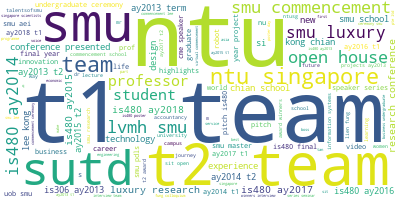

In [242]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df3_dropna_object_col['title_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

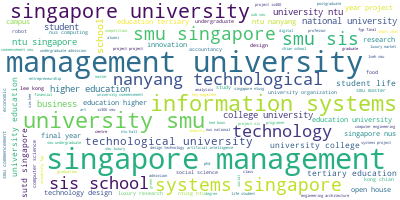

In [243]:
# Join the different processed titles together.
long_string = ','.join(list(df3_dropna_object_col['keywords_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [247]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') # You can define your own parameters
X = cv.fit_transform(df3_dropna_object_col['title_processed'])
Xc = (X.T * X)
Xc.setdiag(0)
names = cv.get_feature_names()
df_count_vect = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df_count_vect.to_csv('title_gephi.csv', sep = ',')

In [245]:
df_count_vect

,01,02,03,04,05,06,07,10,100,101,...,zora,zuêrst,éxi,ðÿ,ðÿž,向洋,吳詠賢,开启机遇之门,我懂你,新加坡管理大学专业会计硕士学位
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
向洋,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
吳詠賢,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
开启机遇之门,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
我懂你,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [114]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') # You can define your own parameters
# X = cv.fit_transform(df3_dropna_object_col['keywords'])
# Xc = (X.T * X) # This is the matrix manipulation step
# Xc.setdiag(0) # We set the diagonals to be zeroes as it's pointless to be 1
# import pandas as pd
# names = cv.get_feature_names() # This are the entity names (i.e. keywords)
# df_gephi = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
# df_gephi.to_csv('keywords_gephi_v2.csv', sep = ',')

In [16]:
ntu_scse = df4[df4['author'] == "SCSEMarketing"]
ntu_scse = ntu_scse.reset_index(drop = True)
ntu_scse

,title,videoLength,author,category,subscriberCountProcessed,publishDateProcessed,descriptionProcessed,keywordsProcessed,viewCountProcessed,likeCountProcessed
0,Trinh Tuan Dung - Interactive Course Materials...,185,SCSEMarketing,Education,361,2021-06-08,,,0.0,0.0
1,Li Yuanming - Distributed Machine Learning,470,SCSEMarketing,Education,361,2021-06-09,,,1.0,0.0
2,25_Mantri Raghav_Feature Selection for Demand ...,393,SCSEMarketing,Education,361,2022-02-16,,,2.0,0.0
3,Chen Taoyu - Instruction Level Branch Conditio...,416,SCSEMarketing,Education,361,2021-06-09,,,2.0,0.0
4,26_Mok Wei Min_ ARTVStudio,227,SCSEMarketing,Education,361,2022-02-16,,,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1112,Tan Chade-Meng Google's Jolly Good Fellow (Whi...,321,SCSEMarketing,Education,361,2012-06-06,"SCE Alumnus; Smart, Passionate, Kind & Compass...","Tan Chade-Meng, Google, Jolly Good Fellow, SCE...",286.0,1.0
1113,Greetings to incoming Undergraduates from SCE ...,52,SCSEMarketing,Education,361,2012-06-06,"Srikanthan Thambipillai, Chair of the School o...","Education, School of Computer Engineering, Com...",577.0,1.0
1114,Research Video,372,SCSEMarketing,Education,361,2012-06-06,,"Computer Engineering, Computer Science, Resear...",73.0,0.0
1115,Android Phone Based RC Helicopter | Final Year...,114,SCSEMarketing,Education,361,2012-06-06,The Android Phone Based RC Helicopter is a rem...,"Andriod, Andriod Phone, RC Helicopter, RC, Rem...",8564.0,15.0


In [17]:
smu_scis = df4[df4['author'] == "SMU School of Computing and Information Systems"]
smu_scis = smu_scis.reset_index(drop = True)
smu_scis

,title,videoLength,author,category,subscriberCountProcessed,publishDateProcessed,descriptionProcessed,keywordsProcessed,viewCountProcessed,likeCountProcessed
0,IS480: Final Year Projects (AY2013 -14 T2): Te...,90,SMU School of Computing and Information Systems,Education,385,2016-04-08,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",1.0,0.0
1,Team Anthanasios,307,SMU School of Computing and Information Systems,Education,385,2013-11-06,,"School of Information Systems, SMU, Is480, Pro...",1.0,0.0
2,B1G1 - Kyaw,26,SMU School of Computing and Information Systems,Education,385,2013-11-06,Kyaw reflects on his project work with B1G1.,"B1g1, Singapore Management University, School ...",1.0,0.0
3,IS480: Final Year Projects (AY2013 -14 T2): Te...,71,SMU School of Computing and Information Systems,Education,385,2016-04-08,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",2.0,0.0
4,iLab,329,SMU School of Computing and Information Systems,Education,385,2013-11-06,,"SMU, SIS, School of Information Systems, Singa...",2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
611,1 minute to know what SMU School of Informatio...,77,SMU School of Computing and Information Systems,Education,385,2014-03-25,SIS Website: http://sis.smu.edu.sg/\n\nFind ou...,"SMU, SIS, School of Information Systems, Singa...",3402.0,10.0
612,Information Systems in SMU (Produced in 2020),381,SMU School of Computing and Information Systems,Education,385,2020-02-27,* School Name has been changed to School of Co...,"SMU, SIS, School of Information Systems, Singa...",7301.0,72.0
613,Computer Science in SMU (Produced in 2020),317,SMU School of Computing and Information Systems,Education,385,2020-02-25,* School Name has been changed to School of Co...,"SMU, SIS, School of Information Systems, Singa...",9023.0,56.0
614,What makes #SMUMITB special? Hear from Ms Anut...,44,SMU School of Computing and Information Systems,Education,385,2020-08-31,Do you know why SMU Master of IT in Business (...,"SMU, SIS, School of Information Systems, Singa...",102270.0,2.0


In [18]:
smu = df4[df4['author'] == "Singapore Management University"]
smu = smu.reset_index(drop = True)
smu

,title,videoLength,author,category,subscriberCountProcessed,publishDateProcessed,descriptionProcessed,keywordsProcessed,viewCountProcessed,likeCountProcessed
0,AMERICAN WRITERS FESTIVAL 2013: DAY 5 PART 3,1969,Singapore Management University,Education,12400,2015-07-21,Every event is different and yet every event d...,,6.0,0.0
1,AMERICAN WRITERS FESTIVAL 2013: DAY 5 PART 1,1745,Singapore Management University,Education,12400,2015-07-21,Every event is different and yet every event d...,,8.0,0.0
2,AMERICAN WRITERS FESTIVAL 2013: DAY 3 PART 2,1117,Singapore Management University,Education,12400,2015-07-21,Every event is different and yet every event d...,,8.0,0.0
3,AMERICAN WRITERS FESTIVAL 2013: DAY 2 PART 2,1443,Singapore Management University,Education,12400,2015-07-21,Every event is different and yet every event d...,,9.0,1.0
4,AMERICAN WRITERS FESTIVAL 2014: DAY 2 Part 2,1570,Singapore Management University,Education,12400,2015-07-21,Additional info :This year is indeed a very sp...,,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1171,SMU MSc in Innovation: Someone Who Innovates,24,Singapore Management University,Education,12400,2017-03-21,Want to become Asia's next Innovation Leader? ...,"Singapore Management University, SMU, MSc in I...",277068.0,4.0
1172,Why pursue SMU Master of Business in IT (MITB)?,87,Singapore Management University,Education,12400,2020-09-30,Gain insights into the MITB programme highligh...,"singapore management university, smu, singapor...",317239.0,6.0
1173,SMU City Perspectives,76,Singapore Management University,Education,12400,2021-01-07,Cities grow when ideas chart larger conversati...,"singapore management university, smu, singapor...",506827.0,12.0
1174,SMU Ho Rih Hwa Lecture: Datuk Seri Anwar Ibrah...,4277,Singapore Management University,Education,12400,2018-09-21,Singapore Management University (SMU) was priv...,"Ho Rih Hwa Leadership Lecture Series, HRH Lect...",734521.0,3284.0


In [19]:
nus = df4[df4['author'] == "NUS"]
nus = nus.reset_index(drop = True)
nus

,title,videoLength,author,category,subscriberCountProcessed,publishDateProcessed,descriptionProcessed,keywordsProcessed,viewCountProcessed,likeCountProcessed
0,CAREER COMPASS: NUS CDE: An interdisciplinary ...,804,NUS,Education,623,2022-03-03,"CNA938 Career Compass | Monday, 14 February 20...","National University of Singapore, Singapore, N...",24.0,0.0
1,CAREER COMPASS: All you need to know about the...,898,NUS,Education,623,2022-03-03,"CNA938 Career Compass | Monday, 21 February 20...","National University of Singapore, Singapore, N...",25.0,0.0
2,CAREER COMPASS: Helping NUS students build a s...,823,NUS,Education,623,2022-03-03,"CNA938 Career Compass | Monday, 7 February 202...","National University of Singapore, Singapore, N...",39.0,0.0
3,CAREER COMPASS: An enhanced undergraduate expe...,969,NUS,Education,623,2022-03-03,"CNA938 Career Compass | Monday, 28 February 20...","National University of Singapore, Singapore, N...",49.0,0.0
4,The SCOT Experience,135,NUS,People & Blogs,623,2016-01-12,Hop on and experience a driverless ride with S...,"National University of Singapore, Singapore, NUS",49.0,0.0
...,...,...,...,...,...,...,...,...,...,...
82,NUS Student Life,186,NUS,People & Blogs,623,2016-12-01,Check out this video to get a glimpse of the e...,"National University of Singapore, Singapore, NUS",419.0,1.0
83,Best of NUSSU Rag 2015,215,NUS,People & Blogs,623,2016-12-01,"Held on August 7 2015, NUS Students Union Rag ...","National University of Singapore, Singapore, NUS",324.0,0.0
84,NUS Institutional Video - Chinese,220,NUS,People & Blogs,623,2016-12-01,The NUS institutional video captures the disti...,,195.0,0.0
85,The SCOT Experience,135,NUS,People & Blogs,623,2016-12-01,Hop on and experience a driverless ride with S...,"National University of Singapore, Singapore, NUS",49.0,0.0


In [20]:
nus_computing = df4[df4['author'] == "NUS Computing"]
nus_computing = nus_computing.reset_index(drop = True)
nus_computing

,title,videoLength,author,category,subscriberCountProcessed,publishDateProcessed,descriptionProcessed,keywordsProcessed,viewCountProcessed,likeCountProcessed
0,2015 Commencement Pre-Ceremony Video Outtakes,206,NUS Computing,Education,1330,2015-07-15,"Our profs are experts in their fields, but not...","Graduation (Field Of Study), National Universi...",113.0,0.0
1,Outtakes: Insider Tips for Freshmen - Ash & As...,90,NUS Computing,Education,1330,2015-10-27,Check out all the bits of this funny duo that ...,National University Of Singapore (College/Univ...,181.0,0.0
2,2015 Commencement Clip Colin Tan,76,NUS Computing,Education,1330,2015-07-15,Dr Colin Tan congratulates the Class of 2015 a...,"Graduation (Field Of Study), Computer Engineer...",181.0,0.0
3,11th STePS: SoC Term Project Showcase,70,NUS Computing,Education,1330,2017-11-16,Students showcase their innovative and excitin...,"school, university, class, term, project, show...",201.0,1.0
4,2015 Commencement Clip Ooi Wei Tsang,22,NUS Computing,Education,1330,2015-07-15,Associate Professor Ooi Wei Tsang encourages t...,"Graduation (Field Of Study), Computer Science ...",263.0,1.0
...,...,...,...,...,...,...,...,...,...,...
161,2015 Commencement Clip Tuan Q Phan,64,NUS Computing,Education,1330,2015-07-15,It's a special year for Dr. Tuan Phan as the f...,"Graduation (Field Of Study), Information Syste...",560.0,2.0
162,Computing Through The Ages,211,NUS Computing,Education,1330,2014-01-12,NUS School of Computing celebrates its 16th an...,"Computer Science (Field Of Study), Computing (...",388.0,2.0
163,NUS School of Computing,263,NUS Computing,Education,1330,2014-08-10,Thinking about what to study at university? Ge...,National University Of Singapore (College/Univ...,17059.0,96.0
164,Computing Through The Ages - Teaser,74,NUS Computing,Travel & Events,1330,2014-02-10,"Calling all DCS, DISCS, and SoC Alumni!\n\nWeâ...","Computing (Website Category), Computer Science...",466.0,3.0


In [21]:
ntu = df4[df4['author'] == "NTUsg"]
ntu = ntu.reset_index(drop = True)
ntu

,title,videoLength,author,category,subscriberCountProcessed,publishDateProcessed,descriptionProcessed,keywordsProcessed,viewCountProcessed,likeCountProcessed
0,"Healthier, more sustainable alternative to pal...",100,NTUsg,Education,18100,2022-03-21,A healthier oil made from microalgae may be th...,"Nanyang Technological University, NTU Singapor...",134.0,0.0
1,Your guide to the NTU HEY! AR app,66,NTUsg,Education,18100,2020-10-18,Interact with your copy of HEY! and watch page...,"HEY!, HEY! AR, HEY! magazine, NTU Magazine, AR...",176.0,4.0
2,PRWeek Awards Asia 2014 Best Corporate Publica...,15,NTUsg,Education,18100,2014-08-21,NTU’s HEY! magazine was named Best Corporate P...,,179.0,2.0
3,An submarine Q&A with a national underwater ru...,35,NTUsg,Science & Technology,18100,2021-09-08,National underwater rugby player and NTU alumn...,,182.0,1.0
4,Art and technology on the runway,136,NTUsg,Education,18100,2013-07-23,"Weaving art with technology, undergraduates fr...",Nanyang Technological University (Organization...,184.0,1.0
...,...,...,...,...,...,...,...,...,...,...
458,NTU studentsâ€™ favourite BBT,43,NTUsg,Education,0,2020-10-18,NTU students spill on their favourite bubble t...,"HEY!, HEY! AR, HEY! magazine, NTU Magazine, AR...",0.0,0.0
459,Celebrate with these Instagram filters for #NT...,47,NTUsg,Education,0,2020-06-28,"#NTUsgClassof2020, ARe you ready to celebrate ...","Nanyang Technological University, NTU Singapor...",0.0,0.0
460,Latte art by Connect 71,50,NTUsg,Education,0,2020-02-18,Baristas at Connect71 in NTU create works of a...,,0.0,0.0
461,Drawings of The Hive by primary school students,19,NTUsg,Education,0,2020-02-18,"The Hive, NTUâ€™s learning hub, has inspired c...",,0.0,0.0


In [22]:
suss = df4[df4['author'] == "Singapore University of Social Sciences (SUSS)"]
suss = suss.reset_index(drop = True)
suss

,title,videoLength,author,category,subscriberCountProcessed,publishDateProcessed,descriptionProcessed,keywordsProcessed,viewCountProcessed,likeCountProcessed
0,Make Your Mark For The Greater Good - Radiah (...,30,Singapore University of Social Sciences (SUSS),Education,0,2022-03-21,Radiah shares how learning from industry pract...,,20.0,0.0
1,Make Your Mark For The Greater Good - Samantha...,30,Singapore University of Social Sciences (SUSS),Education,0,2022-03-21,Samantha shares how SUSS made a difference in ...,,24.0,0.0
2,Make Your Mark For The Greater Good - Firdaus...,29,Singapore University of Social Sciences (SUSS),Education,0,2022-03-21,Firdaus discusses how the learning culture at ...,,13.0,0.0
3,Make Your Mark For The Greater Good - Edwin Ho...,30,Singapore University of Social Sciences (SUSS),Education,0,2022-03-21,Edwin discuss how entrepreneurship programmes ...,,18.0,0.0
4,SUSS Human Factors Programme,191,Singapore University of Social Sciences (SUSS),Education,0,2022-03-16,"20 QUESTIONS WITH SUSS: A/P Chui Yoon Ping, fr...",,72.0,1.0
...,...,...,...,...,...,...,...,...,...,...
322,Unleash Your Potential To Excel,15,Singapore University of Social Sciences (SUSS),Education,0,2017-06-01,If you dream of building a better future for y...,"UniSIM, SIM University, Degree, Undergraduate",88032.0,1.0
323,Join The U That Believes In U,60,Singapore University of Social Sciences (SUSS),Education,0,2016-04-09,"At SIM University, youâ€™ll discover that noth...","UniSIM, SIM University, SIM, Further Education...",148879.0,5.0
324,Join The U That Believes In U,90,Singapore University of Social Sciences (SUSS),Education,0,2016-01-08,"At SIM University, youâ€™ll discover that noth...","UniSIM, Open House, SIM University",152168.0,8.0
325,Life as a UniSIM SBIZ student (Part 1 of 4) â€...,68,Singapore University of Social Sciences (SUSS),Education,0,2016-06-20,Ever wondered what life is like as a student i...,"UniSIM, SIM University",1152.0,3.0


In [23]:
sutd = df4[df4['author'] == "SUTD Singapore University of Technology and Design"]
sutd = sutd.reset_index(drop = True)
sutd

,title,videoLength,author,category,subscriberCountProcessed,publishDateProcessed,descriptionProcessed,keywordsProcessed,viewCountProcessed,likeCountProcessed
0,SUTD Design Innovation Forum 2022,7125,SUTD Singapore University of Technology and De...,Education,3500,2022-03-15,"SUTDâ€™s mission of ""A Better World by Design""...",,683.0,17.0
1,Project SO COOL! - an SUTD innovation designed...,15,SUTD Singapore University of Technology and De...,Education,3500,2022-02-28,Design helps keep us cool in the park. Harness...,,7687.0,15.0
2,Project Sproot - an SUTD innovation designed f...,15,SUTD Singapore University of Technology and De...,Education,3500,2022-02-28,Design transforms the way we eat and grow food...,,7841.0,14.0
3,Ask CSD (Computer Science and Design) - SUTD O...,3136,SUTD Singapore University of Technology and De...,Education,3500,2022-02-20,Learn more about our Computer Science and Desi...,,713.0,9.0
4,Admissions and Scholarships 101 - SUTD Open Ho...,2979,SUTD Singapore University of Technology and De...,Education,3500,2022-02-20,Find out everything you need to know about app...,,434.0,8.0
...,...,...,...,...,...,...,...,...,...,...
425,Interviews with our President and Board of Tru...,546,SUTD Singapore University of Technology and De...,Education,3500,2010-12-03,The Singapore University of Technology and Des...,"SUTD, sutd, university, technology, design, Si...",3153.0,10.0
426,The Ideas Economy,125,SUTD Singapore University of Technology and De...,Education,3500,2010-12-03,The Singapore University of Technology and Des...,"SUTD, sutd, Singapore, university, technology,...",1078.0,5.0
427,Interview with Participating MIT Faculty Membe...,244,SUTD Singapore University of Technology and De...,Education,3500,2010-11-03,Interview of John E. Fernandez - Associate Pro...,richard de neufville,2626.0,5.0
428,Prof. Thomas Magnanti,282,SUTD Singapore University of Technology and De...,Education,3500,2010-11-03,President of Singapore University of Technolog...,"SUTD, sutd, Singapore, university, technology,...",1846.0,6.0


In [24]:
sit = df4[df4['author'] == "Singapore Institute of Technology (SIT)"]
sit = sit.reset_index(drop = True)
sit

,title,videoLength,author,category,subscriberCountProcessed,publishDateProcessed,descriptionProcessed,keywordsProcessed,viewCountProcessed,likeCountProcessed
0,Building Partnerships: Siemens Pte Ltd,86,Singapore Institute of Technology (SIT),Entertainment,2510,2022-03-24,SIT has partnered Siemens Pte Ltd to develop a...,,28.0,0.0
1,Building Partnerships: Singapore Logistics Ass...,90,Singapore Institute of Technology (SIT),Entertainment,2510,2022-03-17,A partnership with the Singapore Logistics Ass...,,44.0,0.0
2,Protein Supplements for the Asian Palate,215,Singapore Institute of Technology (SIT),Entertainment,2510,2022-03-14,"When you think about protein supplements, flav...",,121.0,5.0
3,Building Partnerships: YCH Group and Y3 Techno...,89,Singapore Institute of Technology (SIT),Entertainment,2510,2022-10-03,Digitalisation is essential to an ever-changin...,,69.0,2.0
4,Our #SITizens: Agnes Chew,145,Singapore Institute of Technology (SIT),Education,2510,2022-01-03,Meet #SITizen Agnes Chew! Her love for science...,"education, university, degree programme, stude...",264.0,6.0
...,...,...,...,...,...,...,...,...,...,...
410,SIT Open House 2011 - The Culinary Institute o...,347,Singapore Institute of Technology (SIT),Education,2510,2011-03-18,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",4688.0,6.0
411,SIT Open House 2011 Admissions Talk,388,Singapore Institute of Technology (SIT),Education,2510,2011-03-18,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h...",370.0,0.0
412,SIT Open House 2011 Highlights,599,Singapore Institute of Technology (SIT),Education,2510,2011-03-13,Have a look at what happened over the 2 days w...,"Open house, talks, SIT, highlights, university...",647.0,1.0
413,"Dr Ting Seng Kiong, Deputy President (Academic...",404,Singapore Institute of Technology (SIT),Education,2510,2011-03-13,"Dr Ting gives his introduction to SIT, who we ...","SIT, speech, university, singaporetech, open h...",1474.0,8.0


array([[<AxesSubplot:title={'center':'videoLength'}>,
        <AxesSubplot:title={'center':'subscriberCountProcessed'}>],
       [<AxesSubplot:title={'center':'publishDateProcessed'}>,
        <AxesSubplot:title={'center':'viewCountProcessed'}>],
       [<AxesSubplot:title={'center':'likeCountProcessed'}>,
        <AxesSubplot:>]], dtype=object)

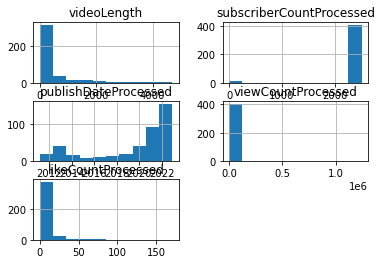

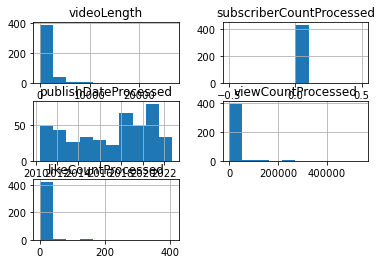

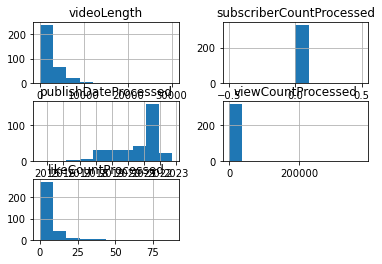

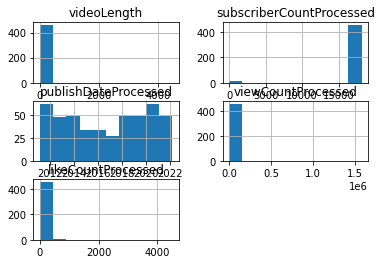

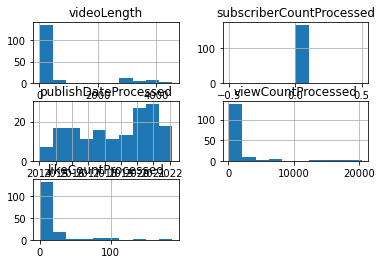

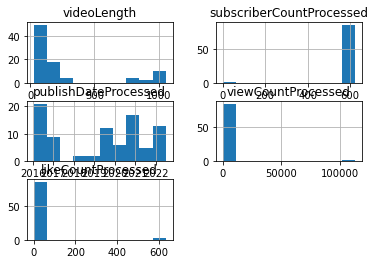

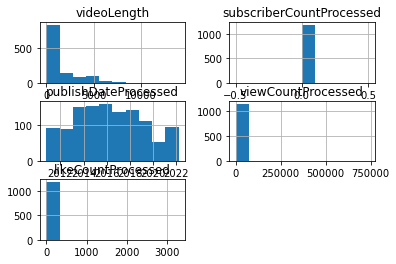

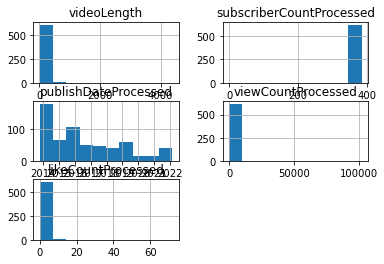

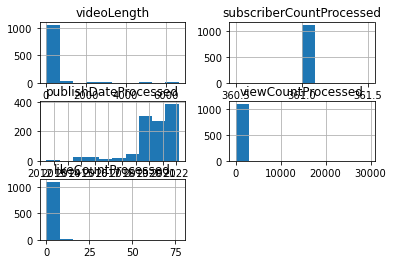

In [25]:
sit.hist()
sutd.hist()
suss.hist()
ntu.hist()
nus_computing.hist()
nus.hist()
smu.hist()
smu_scis.hist()
ntu_scse.hist()

<AxesSubplot:>

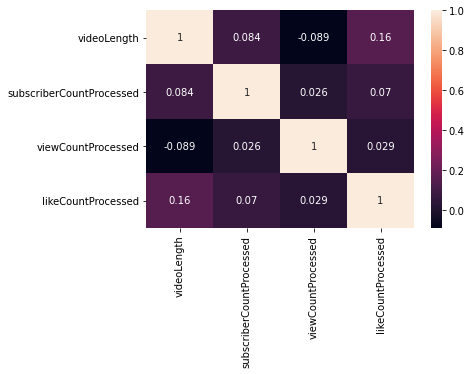

In [34]:
import seaborn as sns
sns.heatmap(sit.corr(),annot = True)

<AxesSubplot:>

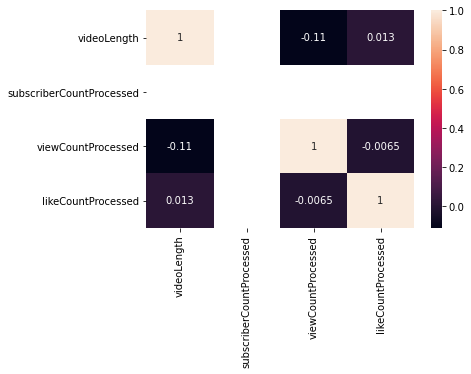

In [27]:
sns.heatmap(suss.corr(),annot = True)


<AxesSubplot:>

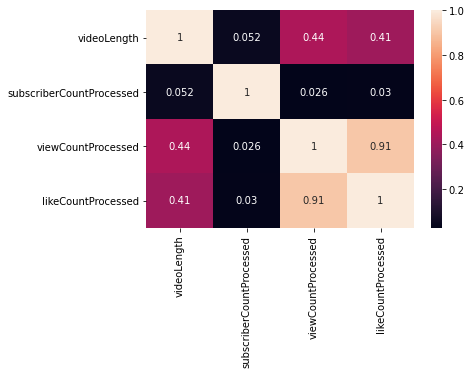

In [28]:
sns.heatmap(ntu.corr(),annot = True)


<AxesSubplot:>

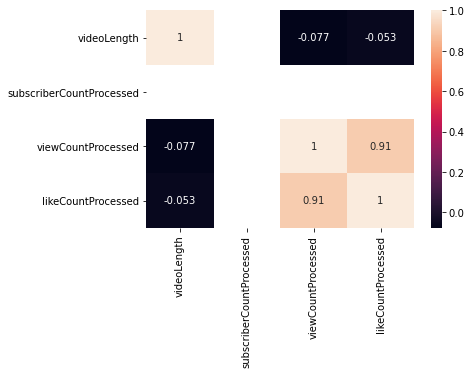

In [29]:
sns.heatmap(nus_computing.corr(),annot = True)


<AxesSubplot:>

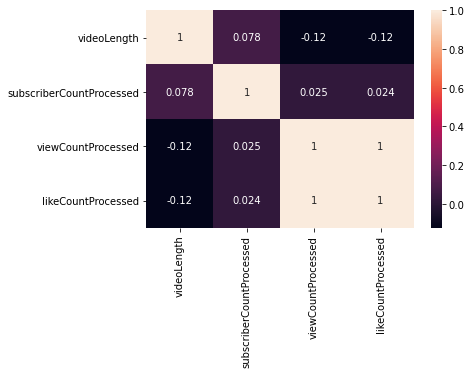

In [30]:
sns.heatmap(nus.corr(),annot = True)


<AxesSubplot:>

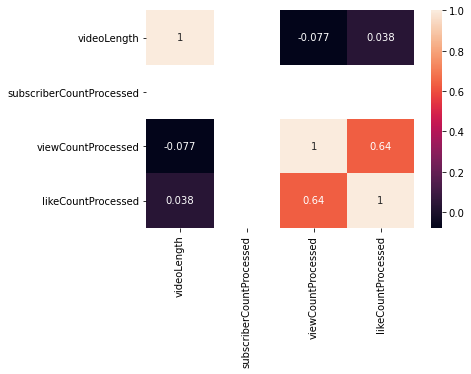

In [31]:
sns.heatmap(smu.corr(),annot = True)


<AxesSubplot:>

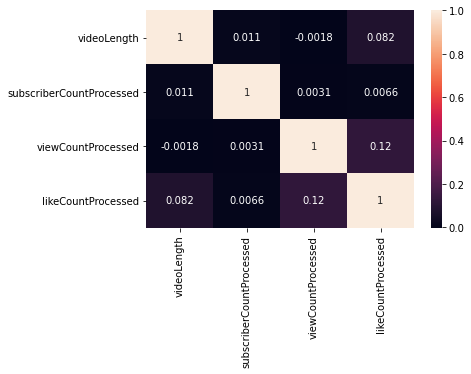

In [32]:
sns.heatmap(smu_scis.corr(),annot = True)


<AxesSubplot:>

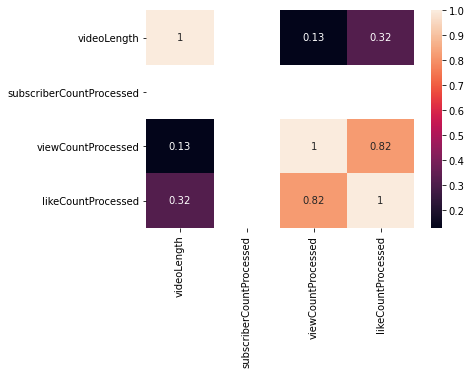

In [33]:
sns.heatmap(ntu_scse.corr(),annot = True)

In [36]:
df4.head()

,title,videoLength,author,category,subscriberCountProcessed,publishDateProcessed,descriptionProcessed,keywordsProcessed,viewCountProcessed,likeCountProcessed
0,Trinh Tuan Dung - Interactive Course Materials...,185,SCSEMarketing,Education,361,2021-06-08,,,0.0,0.0
1,IS480: Final Year Projects (AY2013 -14 T2): Te...,90,SMU School of Computing and Information Systems,Education,385,2016-04-08,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa...",1.0,0.0
2,Team Anthanasios,307,SMU School of Computing and Information Systems,Education,385,2013-11-06,,"School of Information Systems, SMU, Is480, Pro...",1.0,0.0
3,B1G1 - Kyaw,26,SMU School of Computing and Information Systems,Education,385,2013-11-06,Kyaw reflects on his project work with B1G1.,"B1g1, Singapore Management University, School ...",1.0,0.0
4,Li Yuanming - Distributed Machine Learning,470,SCSEMarketing,Education,361,2021-06-09,,,1.0,0.0


title                          0

description                 1327

videoLength                    0

keywords                    2041

author                         0

viewCount                     33

likeCount                   1962

category                       0

subscriberCountProcessed       0

publishDateProcessed           0

In [38]:
categorical = df4.select_dtypes(include=['object']).copy()
categorical

,title,author,category,descriptionProcessed,keywordsProcessed
0,Trinh Tuan Dung - Interactive Course Materials...,SCSEMarketing,Education,,
1,IS480: Final Year Projects (AY2013 -14 T2): Te...,SMU School of Computing and Information Systems,Education,http://wiki.smu.edu.sg/is480/Main_Page,"SMU, SIS, School of Information Systems, Singa..."
2,Team Anthanasios,SMU School of Computing and Information Systems,Education,,"School of Information Systems, SMU, Is480, Pro..."
3,B1G1 - Kyaw,SMU School of Computing and Information Systems,Education,Kyaw reflects on his project work with B1G1.,"B1g1, Singapore Management University, School ..."
4,Li Yuanming - Distributed Machine Learning,SCSEMarketing,Education,,
...,...,...,...,...,...
4792,SIT Open House 2011 - The Culinary Institute o...,Singapore Institute of Technology (SIT),Education,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h..."
4793,SIT Open House 2011 Admissions Talk,Singapore Institute of Technology (SIT),Education,Singapore Institute of Technology (SIT) had ou...,"SIT, speech, university, singaporetech, open h..."
4794,SIT Open House 2011 Highlights,Singapore Institute of Technology (SIT),Education,Have a look at what happened over the 2 days w...,"Open house, talks, SIT, highlights, university..."
4795,"Dr Ting Seng Kiong, Deputy President (Academic...",Singapore Institute of Technology (SIT),Education,"Dr Ting gives his introduction to SIT, who we ...","SIT, speech, university, singaporetech, open h..."


In [138]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') # You can define your own parameters
X = cv.fit_transform(df3['keywords'])
Xc = (X.T * X) # This is the matrix manipulation step
Xc.setdiag(0) # We set the diagonals to be zeroes as it's pointless to be 1
import pandas as pd
names = cv.get_feature_names() # This are the entity names (i.e. keywords)
df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df.to_csv('keywords_gephi.csv', sep = ',')

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [126]:
# Import packages
import nltk
from pprint import pprint
import yaml
import sys
import os
import re

dict_tagged_sentences = ''
# Below indicates the relative path to
# positive/negative/inverter/incrementer/decrementer files
DICTIONARY_DIR_PREFIX = 'dicts/'

In [127]:
class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input format: a paragraph of text
        output format: a list of lists of words.
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences


class POSTagger(object):
    def __init__(self):
        pass

    def pos_tag(self, sentences):
        """
        input format: list of lists of words
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        output format: list of lists of tagged tokens. Each tagged tokens has a
        form, a lemma, and a list of tags
            e.g: [[('this', 'this', ['DT']), ('is', 'be', ['VB']), ('a', 'a', ['DT']), ('sentence', 'sentence', ['NN'])],
                    [('this', 'this', ['DT']), ('is', 'be', ['VB']), ('another', 'another', ['DT']), ('one', 'one', ['CARD'])]]
        """

        pos = [nltk.pos_tag(sentence) for sentence in sentences]
        #adapt format
        pos = [[(word, word, [postag]) for (word, postag) in sentence] for sentence in pos]
        return pos

class DictionaryTagger(object):
    def __init__(self, dictionary_paths):
        """

        :rtype : object
        """
        files = [open(path, 'r') for path in dictionary_paths]
        dictionaries = [yaml.load(dict_file) for dict_file in files]
        map(lambda x: x.close(), files)
        self.dictionary = {}
        self.max_key_size = 0
        for curr_dict in dictionaries:
            for key in curr_dict:
                if key in self.dictionary:
                    self.dictionary[key].extend(curr_dict[key])
                else:
                    self.dictionary[key] = curr_dict[key]
                    self.max_key_size = max(self.max_key_size, len(key))

    def tag(self, postagged_sentences):
        return [self.tag_sentence(sentence) for sentence in postagged_sentences]

    def tag_sentence(self, sentence, tag_with_lemmas=False):
        """
        the result is only one tagging of all the possible ones.
        The resulting tagging is determined by these two priority rules:
            - longest matches have higher priority
            - search is made from left to right
        """
        tag_sentence = []
        N = len(sentence)
        if self.max_key_size == 0:
            self.max_key_size = N
        i = 0
        while (i < N):
            j = min(i + self.max_key_size, N) #avoid overflow
            tagged = False
            while (j > i):
                expression_form = ' '.join([word[0] for word in sentence[i:j]]).lower()
                expression_lemma = ' '.join([word[1] for word in sentence[i:j]]).lower()
                if tag_with_lemmas:
                    literal = expression_lemma
                else:
                    literal = expression_form
                if literal in self.dictionary:
                    #self.logger.debug("found: %s" % literal)
                    is_single_token = j - i == 1
                    original_position = i
                    i = j
                    taggings = [tag for tag in self.dictionary[literal]]
                    tagged_expression = (expression_form, expression_lemma, taggings)
                    if is_single_token: #if the tagged literal is a single token, conserve its previous taggings:
                        original_token_tagging = sentence[original_position][2]
                        tagged_expression[2].extend(original_token_tagging)
                    tag_sentence.append(tagged_expression)
                    tagged = True
                else:
                    j = j - 1
            if not tagged:
                tag_sentence.append(sentence[i])
                i += 1
        return tag_sentence

def value_of(sentiment):
    if sentiment == 'positive': return 1
    if sentiment == 'negative': return -1
    return 0

def sentiment_score(review):
    return sum ([value_of(tag) for sentence in dict_tagged_sentences for token in sentence for tag in token[2]])

def sentence_score(sentence_tokens, previous_token, acum_score):
    if not sentence_tokens:
        return acum_score
    else:
        current_token = sentence_tokens[0]
        tags = current_token[2]
        token_score = sum([value_of(tag) for tag in tags])
        if previous_token is not None:
            previous_tags = previous_token[2]
            if 'inc' in previous_tags:
                token_score *= 2.0
            elif 'dec' in previous_tags:
                token_score /= 2.0
            elif 'inv' in previous_tags:
                token_score *= -1.0
        return sentence_score(sentence_tokens[1:], current_token, acum_score + token_score)

def sentiment_score(sentences):
    return sum([sentence_score(sentence, None, 0.0) for sentence in sentences])


def run_analysis(text):
    splitter = Splitter() # This boy will split a long single string into sentences.
    postagger = POSTagger() # This boy is the Part-Of-Speech tagger.

    # If text contains multiple sentences, this line splits it into individual sentences.
    splitted_sentences = splitter.split(text)
    print (splitted_sentences)
    #exit(1)

    print ("########## This performs Part-Of-Speech tagging. ##########")
    # This performs Part-Of-Speech tagging.
    pos_tagged_sentences = postagger.pos_tag(splitted_sentences)
    pprint (pos_tagged_sentences)
    exit(1)

    print ("########## This line loads Positive word and Negative word corpus. ##########")
    # This line loads Positive word and Negative word dictionaries.
    dicttagger = DictionaryTagger([ DICTIONARY_DIR_PREFIX + 'positive.yml', DICTIONARY_DIR_PREFIX + 'negative.yml'])
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    #pprint(dict_tagged_sentences)
    #exit(1)

    print ("########## [Baseline Analysis] Using only Positive/Negative corpus. ##########")
    score = sentiment_score(dict_tagged_sentences)
    print ("Score: %d" % score)
    #exit(1)

    print ("########## This line loads Positve/Negative corpus + incrementer/decrementer corpus. ##########")
    dicttagger = DictionaryTagger([ DICTIONARY_DIR_PREFIX + 'positive.yml', DICTIONARY_DIR_PREFIX + 'negative.yml', DICTIONARY_DIR_PREFIX + 'inc.yml', DICTIONARY_DIR_PREFIX + 'dec.yml'])
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    #pprint(dict_tagged_sentences)
    score = sentiment_score(dict_tagged_sentences)
    print ("Score: %d" % score)
    #exit(1)

    print ("########## This line loads Positve/Negative corpus + incrementer/decrementer/inverter corpus. ##########")
    dicttagger = DictionaryTagger([ DICTIONARY_DIR_PREFIX + 'positive.yml', DICTIONARY_DIR_PREFIX + 'negative.yml', DICTIONARY_DIR_PREFIX + 'inc.yml', DICTIONARY_DIR_PREFIX + 'dec.yml', DICTIONARY_DIR_PREFIX + 'inv.yml'])
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    #pprint(dict_tagged_sentences)
    score = sentiment_score(dict_tagged_sentences)
    print ("Score: %d" % score)
    #exit(1)

In [137]:
test = df3.iloc[4795,1]
test

'Dr Ting gives his introduction to SIT, who we are, and what we do. Check it out now!'

In [130]:
################### This is the MAIN section ###################
if __name__ == "__main__":

    print ("###############################")

    review_comment_text = test
    # Run sentiment scoring
    run_analysis(review_comment_text)
    
    ###################### Challenge ######################
    # Modify this script to read from 'Yelp_Food_Input.txt'
    #   Each row is a unique "review" (textual)
    # Open the TXT file and see how to extract the review content (which column contains the content?)
    # Attempt to score each review
    # Summarize the sentiment scores across ALL reviews using apprpriate charts, e.g. bar chart, box plot, etc.

###############################
[['Dr', 'Ting', 'gives', 'his', 'introduction', 'to', 'SIT', ',', 'who', 'we', 'are', ',', 'and', 'what', 'we', 'do', '.'], ['Check', 'it', 'out', 'now', '!']]
########## This performs Part-Of-Speech tagging. ##########
[[('Dr', 'Dr', ['NNP']),
  ('Ting', 'Ting', ['NNP']),
  ('gives', 'gives', ['VBZ']),
  ('his', 'his', ['PRP$']),
  ('introduction', 'introduction', ['NN']),
  ('to', 'to', ['TO']),
  ('SIT', 'SIT', ['NNP']),
  (',', ',', [',']),
  ('who', 'who', ['WP']),
  ('we', 'we', ['PRP']),
  ('are', 'are', ['VBP']),
  (',', ',', [',']),
  ('and', 'and', ['CC']),
  ('what', 'what', ['WP']),
  ('we', 'we', ['PRP']),
  ('do', 'do', ['VBP']),
  ('.', '.', ['.'])],
 [('Check', 'Check', ['VB']),
  ('it', 'it', ['PRP']),
  ('out', 'out', ['RP']),
  ('now', 'now', ['RB']),
  ('!', '!', ['.'])]]
########## This line loads Positive word and Negative word corpus. ##########
########## [Baseline Analysis] Using only Positive/Negative corpus. ##########
Score: 0

<ipython-input-127-1017e9542d06>:43: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dictionaries = [yaml.load(dict_file) for dict_file in files]


In [132]:
# Import packages
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names

positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]

In [133]:
'''
Every word is converted into a feature using a simplified bag of words model:
'''
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

# Have a look at what each "feature set" looks like
print("=================================================")
print(positive_features)
print("=================================================")
print(negative_features)
print("=================================================")
print(neutral_features)

[({'a': True, 'w': True, 'e': True, 's': True, 'o': True, 'm': True}, 'pos'), ({'o': True, 'u': True, 't': True, 's': True, 'a': True, 'n': True, 'd': True, 'i': True, 'g': True}, 'pos'), ({'f': True, 'a': True, 'n': True, 't': True, 's': True, 'i': True, 'c': True}, 'pos'), ({'t': True, 'e': True, 'r': True, 'i': True, 'f': True, 'c': True}, 'pos'), ({'g': True, 'o': True, 'd': True}, 'pos'), ({'n': True, 'i': True, 'c': True, 'e': True}, 'pos'), ({'g': True, 'r': True, 'e': True, 'a': True, 't': True}, 'pos'), ({':': True, ')': True}, 'pos')]
[({'b': True, 'a': True, 'd': True}, 'neg'), ({'t': True, 'e': True, 'r': True, 'i': True, 'b': True, 'l': True}, 'neg'), ({'u': True, 's': True, 'e': True, 'l': True}, 'neg'), ({'h': True, 'a': True, 't': True, 'e': True}, 'neg'), ({':': True, '(': True}, 'neg')]
[({'m': True, 'o': True, 'v': True, 'i': True, 'e': True}, 'neu'), ({'t': True, 'h': True, 'e': True}, 'neu'), ({'s': True, 'o': True, 'u': True, 'n': True, 'd': True}, 'neu'), ({'w': 

In [134]:
train_set = negative_features + positive_features + neutral_features

print(train_set)

[({'b': True, 'a': True, 'd': True}, 'neg'), ({'t': True, 'e': True, 'r': True, 'i': True, 'b': True, 'l': True}, 'neg'), ({'u': True, 's': True, 'e': True, 'l': True}, 'neg'), ({'h': True, 'a': True, 't': True, 'e': True}, 'neg'), ({':': True, '(': True}, 'neg'), ({'a': True, 'w': True, 'e': True, 's': True, 'o': True, 'm': True}, 'pos'), ({'o': True, 'u': True, 't': True, 's': True, 'a': True, 'n': True, 'd': True, 'i': True, 'g': True}, 'pos'), ({'f': True, 'a': True, 'n': True, 't': True, 's': True, 'i': True, 'c': True}, 'pos'), ({'t': True, 'e': True, 'r': True, 'i': True, 'f': True, 'c': True}, 'pos'), ({'g': True, 'o': True, 'd': True}, 'pos'), ({'n': True, 'i': True, 'c': True, 'e': True}, 'pos'), ({'g': True, 'r': True, 'e': True, 'a': True, 't': True}, 'pos'), ({':': True, ')': True}, 'pos'), ({'m': True, 'o': True, 'v': True, 'i': True, 'e': True}, 'neu'), ({'t': True, 'h': True, 'e': True}, 'neu'), ({'s': True, 'o': True, 'u': True, 'n': True, 'd': True}, 'neu'), ({'w': Tr

In [136]:
classifier = NaiveBayesClassifier.train(train_set)
neg = 0
pos = 0
sentence = test
sentence = sentence.lower()
words = sentence.split(' ')
for word in words:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
 
print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

Positive: 0.4444444444444444
Negative: 0.0


In [17]:
df2.describe()

,videoLength,viewCount,likeCount
count,4797.000000,4.764000e+03,2835.000000
mean,720.786950,7.591471e+03,19.262434
std,1536.202159,5.285492e+04,127.770169
min,6.000000,0.000000e+00,1.000000
25%,83.000000,5.300000e+01,2.000000
50%,179.000000,2.750000e+02,5.000000
75%,379.000000,1.053500e+03,11.000000
max,30145.000000,1.577069e+06,4503.000000


array([[<AxesSubplot:title={'center':'videoLength'}>,
        <AxesSubplot:title={'center':'viewCount'}>],
       [<AxesSubplot:title={'center':'likeCount'}>, <AxesSubplot:>]],
      dtype=object)

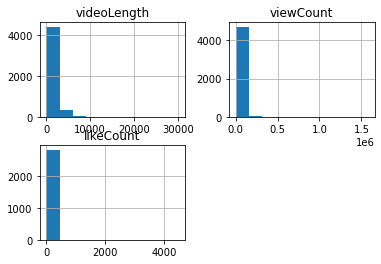

In [18]:
df2.hist()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Anaconda_File\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viewCount', ylabel='Density'>

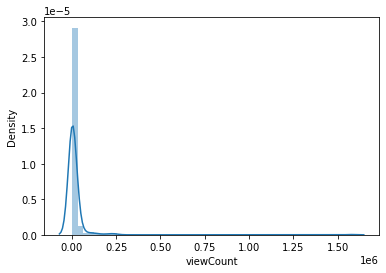

In [20]:
# sns.distplot(sit['viewCount'].dropna())
sns.distplot(ntu['viewCount'].dropna())

array([[<AxesSubplot:title={'center':'videoLength'}>,
        <AxesSubplot:title={'center':'viewCount'}>],
       [<AxesSubplot:title={'center':'likeCount'}>, <AxesSubplot:>]],
      dtype=object)

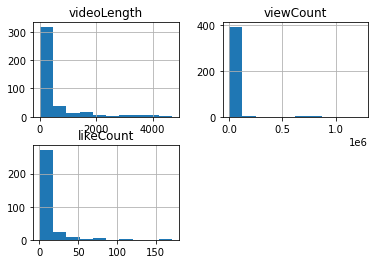

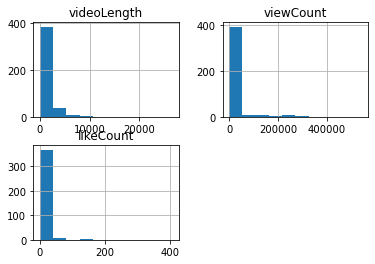

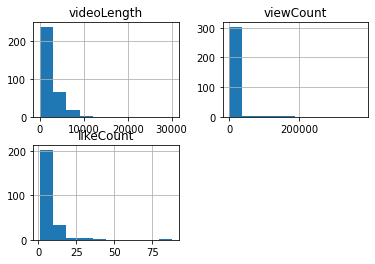

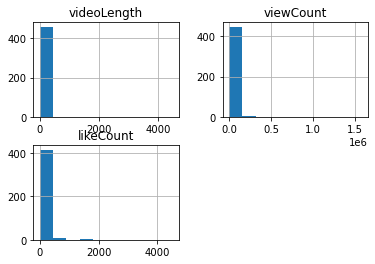

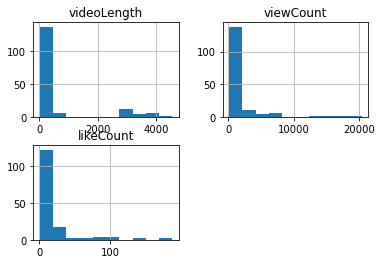

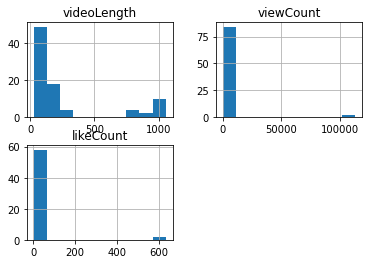

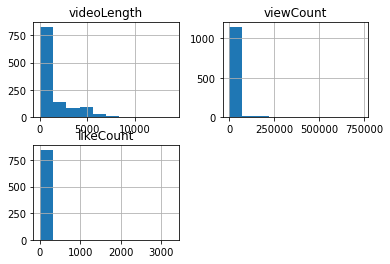

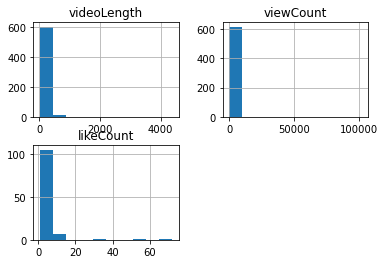

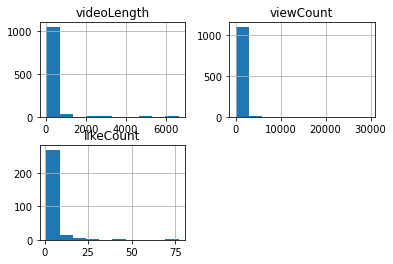

In [21]:

sit.hist()
sutd.hist()
suss.hist()
ntu.hist()
nus_computing.hist()
nus.hist()
smu.hist()
smu_scis.hist()
ntu_scse.hist()

Possible target variables: viewCount and likeCount
Possible contributing variables:
* description

* keywords

* videoLength

* category

In [22]:
df2['category'].unique()

array(['Education', 'People & Blogs', 'Entertainment', 'Film & Animation',
       'Science & Technology', 'Howto & Style', 'Travel & Events',
       'Gaming', 'Sports', 'Nonprofits & Activism'], dtype=object)

In [27]:
df2.head()

,title,description,videoLength,keywords,author,viewCount,likeCount,subscriberCount,category,publishDate,isLiveContent,isFamilySafe,query
0,Trinh Tuan Dung - Interactive Course Materials...,NaN,185.0,NaN,SCSEMarketing,0.0,NaN,361 subscribers,Education,2021-06-08 00:00:00,False,True,https://www.youtube.com/watch?v=7JfrWorLUdw
1,IS480: Final Year Projects (AY2013 -14 T2): Te...,http://wiki.smu.edu.sg/is480/Main_Page,90.0,"SMU, SIS, School of Information Systems, Singa...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2016-04-08 00:00:00,False,True,https://www.youtube.com/watch?v=qnk99rTQZzQ
2,Team Anthanasios,NaN,307.0,"School of Information Systems, SMU, Is480, Pro...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2013-11-06 00:00:00,False,True,https://www.youtube.com/watch?v=UddTUfEwuZk
3,B1G1 - Kyaw,Kyaw reflects on his project work with B1G1.,26.0,"B1g1, Singapore Management University, School ...",SMU School of Computing and Information Systems,1.0,NaN,385 subscribers,Education,2013-11-06 00:00:00,False,True,https://www.youtube.com/watch?v=OUmUlbEV0Mk
4,Li Yuanming - Distributed Machine Learning,NaN,470.0,NaN,SCSEMarketing,1.0,NaN,361 subscribers,Education,2021-06-09 00:00:00,False,True,https://www.youtube.com/watch?v=wEdYJ9NCEPw


In [23]:
df2.groupby('category').count()

,title,description,videoLength,keywords,author,viewCount,likeCount,subscriberCount,publishDate,isLiveContent,isFamilySafe,query
category,,,,,,,,,,,,
Education,4201,2909,4201,2586,4201,4182,2391,3976,4201,4201,4201,4201
Entertainment,313,298,313,20,313,304,227,304,313,313,313,313
Film & Animation,1,1,1,1,1,1,1,1,1,1,1,1
Gaming,2,2,2,2,2,2,2,2,2,2,2,2
Howto & Style,6,6,6,6,6,6,4,6,6,6,6,6
Nonprofits & Activism,2,2,2,2,2,2,2,2,2,2,2,2
People & Blogs,206,186,206,77,206,201,145,92,206,206,206,206
Science & Technology,53,53,53,49,53,53,50,53,53,53,53,53
Sports,4,4,4,4,4,4,4,4,4,4,4,4


In [24]:
import nltk
from pprint import pprint
import yaml
import sys
import os
import re

dict_tagged_sentences = ''
# Below indicates the relative path to
# positive/negative/inverter/incrementer/decrementer files
DICTIONARY_DIR_PREFIX = 'dicts2/'

In [25]:
class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input format: a paragraph of text
        output format: a list of lists of words.
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences


class POSTagger(object):
    def __init__(self):
        pass

    def pos_tag(self, sentences):
        """
        input format: list of lists of words
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        output format: list of lists of tagged tokens. Each tagged tokens has a
        form, a lemma, and a list of tags
            e.g: [[('this', 'this', ['DT']), ('is', 'be', ['VB']), ('a', 'a', ['DT']), ('sentence', 'sentence', ['NN'])],
                    [('this', 'this', ['DT']), ('is', 'be', ['VB']), ('another', 'another', ['DT']), ('one', 'one', ['CARD'])]]
        """

        pos = [nltk.pos_tag(sentence) for sentence in sentences]
        #adapt format
        pos = [[(word, word, [postag]) for (word, postag) in sentence] for sentence in pos]
        return pos

class DictionaryTagger(object):
    def __init__(self, dictionary_paths):
        """

        :rtype : object
        """
        files = [open(path, 'r') for path in dictionary_paths]
        dictionaries = [yaml.load(dict_file) for dict_file in files]
        map(lambda x: x.close(), files)
        self.dictionary = {}
        self.max_key_size = 0
        for curr_dict in dictionaries:
            for key in curr_dict:
                if key in self.dictionary:
                    self.dictionary[key].extend(curr_dict[key])
                else:
                    self.dictionary[key] = curr_dict[key]
                    self.max_key_size = max(self.max_key_size, len(key))

    def tag(self, postagged_sentences):
        return [self.tag_sentence(sentence) for sentence in postagged_sentences]

    def tag_sentence(self, sentence, tag_with_lemmas=False):
        """
        the result is only one tagging of all the possible ones.
        The resulting tagging is determined by these two priority rules:
            - longest matches have higher priority
            - search is made from left to right
        """
        tag_sentence = []
        N = len(sentence)
        if self.max_key_size == 0:
            self.max_key_size = N
        i = 0
        while (i < N):
            j = min(i + self.max_key_size, N) #avoid overflow
            tagged = False
            while (j > i):
                expression_form = ' '.join([word[0] for word in sentence[i:j]]).lower()
                expression_lemma = ' '.join([word[1] for word in sentence[i:j]]).lower()
                if tag_with_lemmas:
                    literal = expression_lemma
                else:
                    literal = expression_form
                if literal in self.dictionary:
                    #self.logger.debug("found: %s" % literal)
                    is_single_token = j - i == 1
                    original_position = i
                    i = j
                    taggings = [tag for tag in self.dictionary[literal]]
                    tagged_expression = (expression_form, expression_lemma, taggings)
                    if is_single_token: #if the tagged literal is a single token, conserve its previous taggings:
                        original_token_tagging = sentence[original_position][2]
                        tagged_expression[2].extend(original_token_tagging)
                    tag_sentence.append(tagged_expression)
                    tagged = True
                else:
                    j = j - 1
            if not tagged:
                tag_sentence.append(sentence[i])
                i += 1
        return tag_sentence

def value_of(sentiment):
    if sentiment == 'positive': return 1
    if sentiment == 'negative': return -1
    return 0

def sentiment_score(review):
    return sum ([value_of(tag) for sentence in dict_tagged_sentences for token in sentence for tag in token[2]])

def sentence_score(sentence_tokens, previous_token, acum_score):
    if not sentence_tokens:
        return acum_score
    else:
        current_token = sentence_tokens[0]
        tags = current_token[2]
        token_score = sum([value_of(tag) for tag in tags])
        if previous_token is not None:
            previous_tags = previous_token[2]
            if 'inc' in previous_tags:
                token_score *= 2.0
            elif 'dec' in previous_tags:
                token_score /= 2.0
            elif 'inv' in previous_tags:
                token_score *= -1.0
        return sentence_score(sentence_tokens[1:], current_token, acum_score + token_score)

def sentiment_score(sentences):
    return sum([sentence_score(sentence, None, 0.0) for sentence in sentences])


def run_analysis(text):
    splitter = Splitter() # This boy will split a long single string into sentences.
    postagger = POSTagger() # This boy is the Part-Of-Speech tagger.

    # If text contains multiple sentences, this line splits it into individual sentences.
    splitted_sentences = splitter.split(text)
    print (splitted_sentences)
    #exit(1)

    print ("########## This performs Part-Of-Speech tagging. ##########")
    # This performs Part-Of-Speech tagging.
    pos_tagged_sentences = postagger.pos_tag(splitted_sentences)
    pprint (pos_tagged_sentences)
    exit(1)

    print ("########## This line loads Positive word and Negative word corpus. ##########")
    # This line loads Positive word and Negative word dictionaries.
    dicttagger = DictionaryTagger([ DICTIONARY_DIR_PREFIX + 'positive.yml', DICTIONARY_DIR_PREFIX + 'negative.yml'])
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    #pprint(dict_tagged_sentences)
    #exit(1)

    print ("########## [Baseline Analysis] Using only Positive/Negative corpus. ##########")
    score = sentiment_score(dict_tagged_sentences)
    print ("Score: %d" % score)
    #exit(1)

    print ("########## This line loads Positve/Negative corpus + incrementer/decrementer corpus. ##########")
    dicttagger = DictionaryTagger([ DICTIONARY_DIR_PREFIX + 'positive.yml', DICTIONARY_DIR_PREFIX + 'negative.yml', DICTIONARY_DIR_PREFIX + 'inc.yml', DICTIONARY_DIR_PREFIX + 'dec.yml'])
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    #pprint(dict_tagged_sentences)
    score = sentiment_score(dict_tagged_sentences)
    print ("Score: %d" % score)
    #exit(1)

    print ("########## This line loads Positve/Negative corpus + incrementer/decrementer/inverter corpus. ##########")
    dicttagger = DictionaryTagger([ DICTIONARY_DIR_PREFIX + 'positive.yml', DICTIONARY_DIR_PREFIX + 'negative.yml', DICTIONARY_DIR_PREFIX + 'inc.yml', DICTIONARY_DIR_PREFIX + 'dec.yml', DICTIONARY_DIR_PREFIX + 'inv.yml'])
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    #pprint(dict_tagged_sentences)
    score = sentiment_score(dict_tagged_sentences)
    print ("Score: %d" % score)
    #exit(1)

In [26]:
################### This is the MAIN section ###################
if __name__ == "__main__":

    print ("###############################")

    review_comment_text = "This restaurant really sucks. The service was terrible. Food was horrible."
    # Run sentiment scoring
    run_analysis(review_comment_text)
    
    ###################### Challenge ######################
    # Modify this script to read from 'Yelp_Food_Input.txt'
    #   Each row is a unique "review" (textual)
    # Open the TXT file and see how to extract the review content (which column contains the content?)
    # Attempt to score each review
    # Summarize the sentiment scores across ALL reviews using apprpriate charts, e.g. bar chart, box plot, etc.

###############################
[['This', 'restaurant', 'really', 'sucks', '.'], ['The', 'service', 'was', 'terrible', '.'], ['Food', 'was', 'horrible', '.']]
########## This performs Part-Of-Speech tagging. ##########
[[('This', 'This', ['DT']),
  ('restaurant', 'restaurant', ['NN']),
  ('really', 'really', ['RB']),
  ('sucks', 'sucks', ['VBZ']),
  ('.', '.', ['.'])],
 [('The', 'The', ['DT']),
  ('service', 'service', ['NN']),
  ('was', 'was', ['VBD']),
  ('terrible', 'terrible', ['JJ']),
  ('.', '.', ['.'])],
 [('Food', 'Food', ['NN']),
  ('was', 'was', ['VBD']),
  ('horrible', 'horrible', ['JJ']),
  ('.', '.', ['.'])]]
########## This line loads Positive word and Negative word corpus. ##########


FileNotFoundError: [Errno 2] No such file or directory: 'dicts2/positive.yml'